In [1]:
import scanpy as sc
import scanpy.external as sce
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rcParams
from matplotlib import colors
import seaborn as sb
from gprofiler import gprofiler

import rpy2.rinterface_lib.callbacks
import logging

from rpy2.robjects import pandas2ri
import anndata2ri

In [2]:
# ignore R warning messages
rpy2.rinterface_lib.callbacks.logger.setLevel(logging.ERROR)

# Automatically convert rpy2 outputs to pandas dataframes
pandas2ri.activate()
anndata2ri.activate()
%load_ext rpy2.ipython

plt.rcParams['figure.figsize']=(8,8) #rescale figures
sc.settings.verbosity = 3
#sc.set_figure_params(dpi=200, dpi_save=300)
sc.logging.print_versions()

scanpy==1.4.3+116.g0075c62 anndata==0.6.22.post2.dev80+g72c2bde umap==0.3.9 numpy==1.17.2 scipy==1.3.0 pandas==0.24.1 scikit-learn==0.21.3 statsmodels==0.10.0rc2 python-igraph==0.7.1 louvain==0.6.1


In [3]:
#User inputs
folder = '/storage/groups/ml01/workspace/malte.luecken/2019_wurst_demuxlet/Main_study/'

adata_preproc = '/storage/groups/ml01/workspace/malte.luecken/2019_wurst_demuxlet/Main_study/processed_data/ipsc_ipd_patients_preproc.h5ad'

adata_full = '/storage/groups/ml01/workspace/malte.luecken/2019_wurst_demuxlet/Main_study/processed_data/ipsc_ipd_patients_full.h5ad'

# Read the data

In [4]:
adata = sc.read(adata_preproc)

In [5]:
adata

AnnData object with n_obs × n_vars = 30557 × 24920 
    obs: 'Demux_state', 'Donor', 'Lane', 'Number of genes', 'Total counts', 'age', 'condition', 'donor', 'gender', 'log_counts', 'mt_frac', 'n_counts', 'n_genes', 'size_factors', 'total_counts', 'years_of_illness', 'S_score', 'G2M_score', 'phase', 'louvain_r1', 'louvain_r0.5', 'louvain_r0.2'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'Donor_colors', 'louvain', 'louvain_r0.2_colors', 'louvain_r0.5_colors', 'louvain_r1_colors', 'neighbors', 'pca', 'phase_colors'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    layers: 'counts'

# Plot clusters and metadata

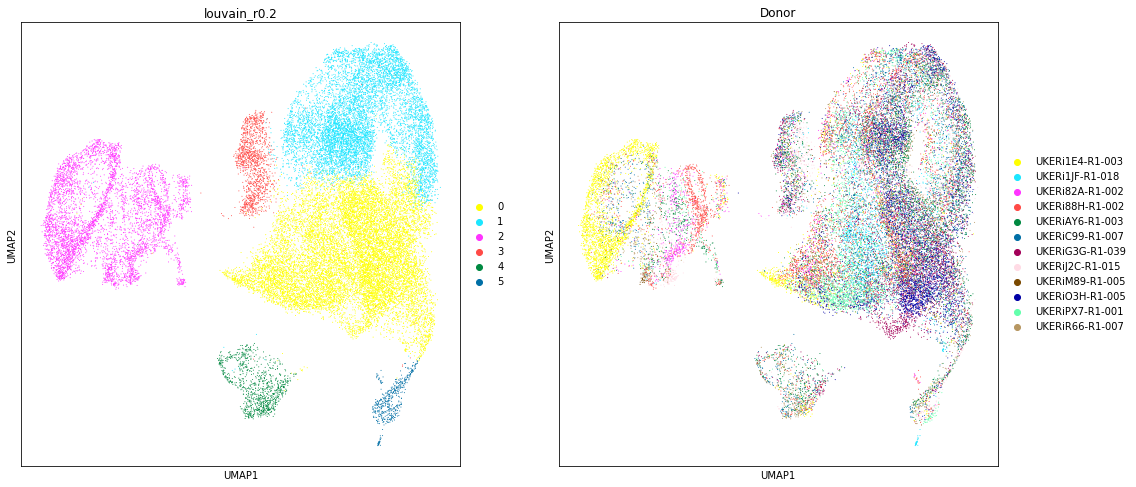

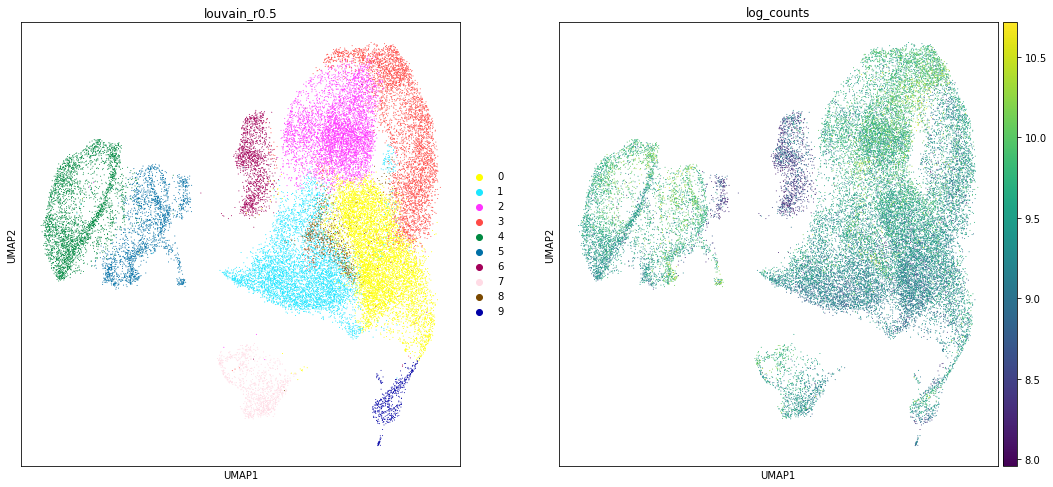

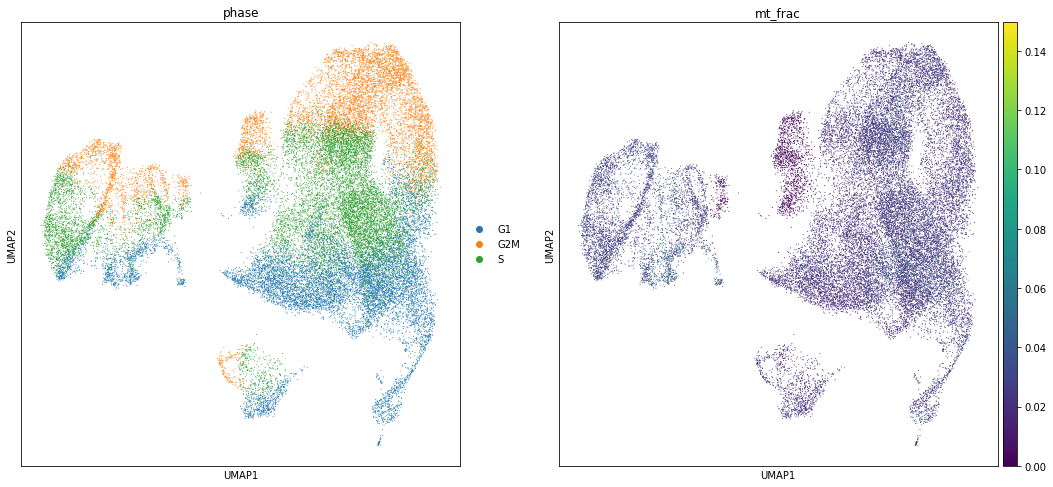

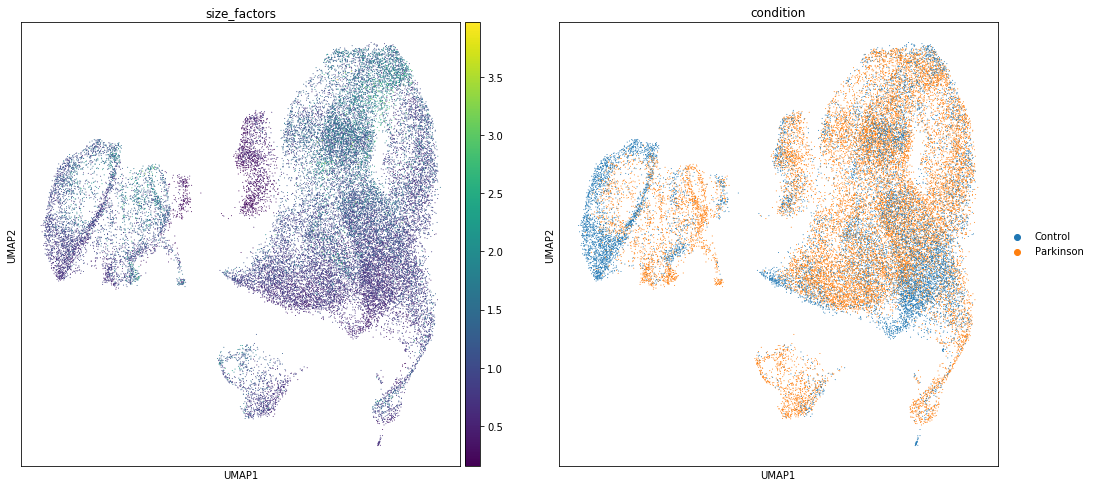

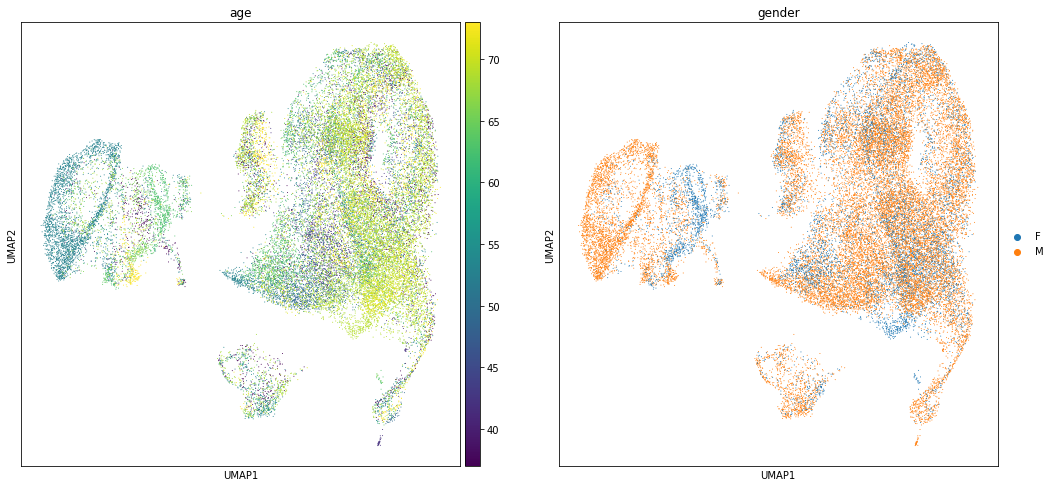

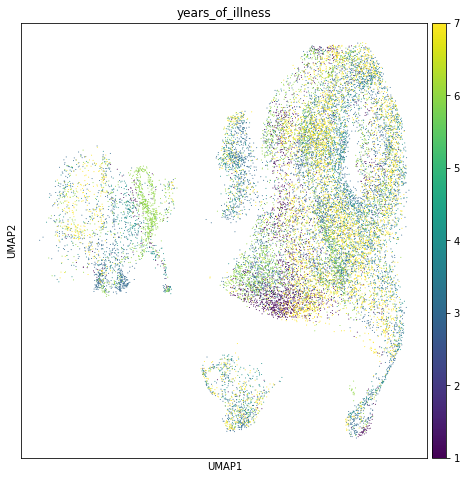

In [6]:
sc.pl.umap(adata, color=['louvain_r0.2', 'Donor'])
sc.pl.umap(adata, color=['louvain_r0.5', 'log_counts'])
sc.pl.umap(adata, color=['phase', 'mt_frac'])
sc.pl.umap(adata, color=['size_factors', 'condition'])
sc.pl.umap(adata, color=['age', 'gender'])
sc.pl.umap(adata, color='years_of_illness')

# Marker genes

In [7]:
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.2', key_added='rank_genes_groups_r0.2')

ranking genes
    finished (0:01:25)


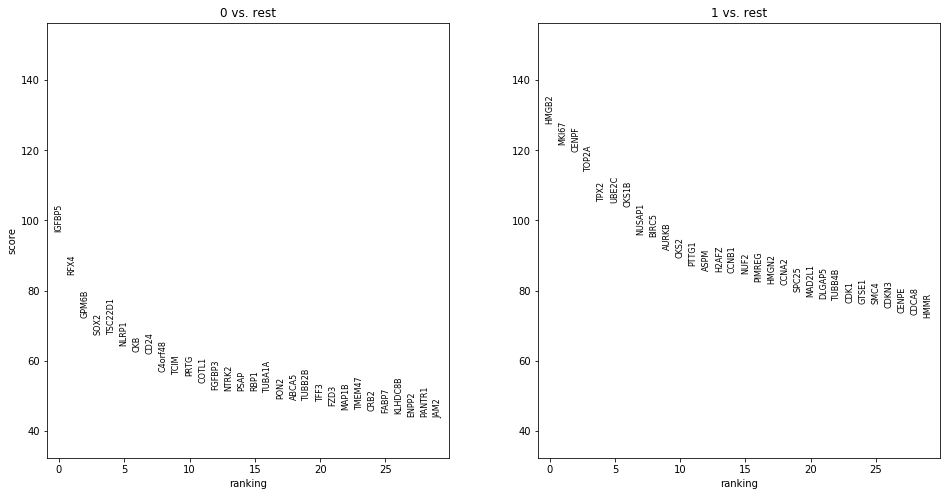

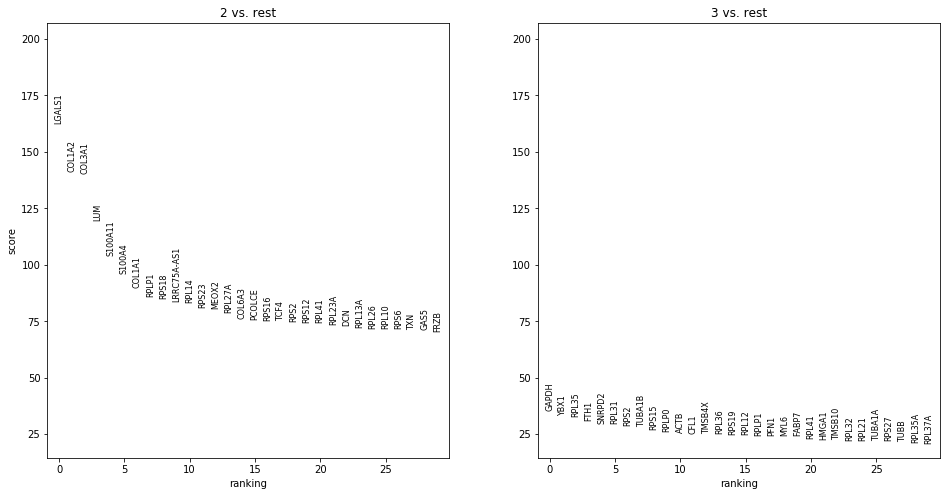

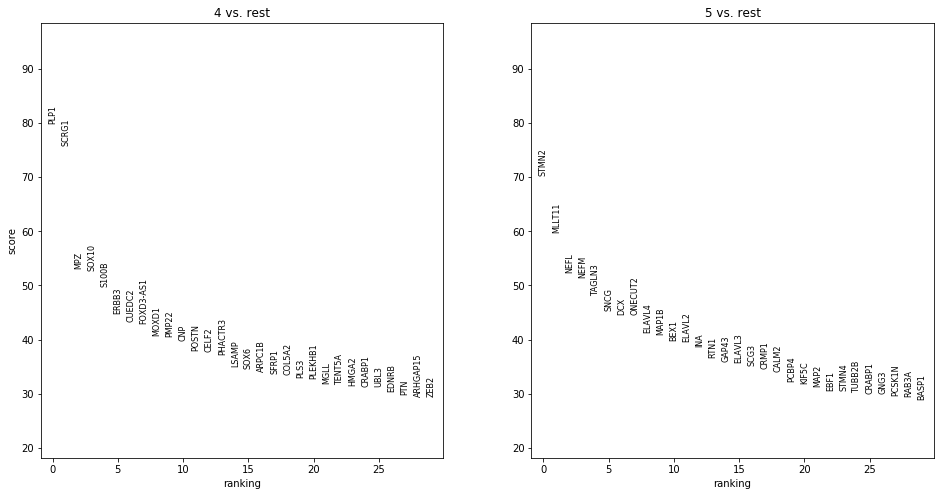

In [8]:
sc.pl.rank_genes_groups(adata, groups=['0','1'], n_genes=30, key='rank_genes_groups_r0.2')
sc.pl.rank_genes_groups(adata, groups=['2','3'], n_genes=30, key='rank_genes_groups_r0.2')
sc.pl.rank_genes_groups(adata, groups=['4','5'], n_genes=30, key='rank_genes_groups_r0.2')

## Marker gene overlaps

In [9]:
marker_genes = dict()
marker_genes['NSC (radial glia)'] = ['NES', 'SOX2', 'NOTCH1', 'HES1', 'HES3', 'OCLN', 'CDH1', 'SOX10', 'SOX9', 'SOX1', 'ASCL1', 'NOTCH2', 'OTX2', 'FUT4']
marker_genes['NPC'] = ['HMGB2', 'SOX1', 'SOX2', 'SOX11', 'FABP7', 'SFRP1', 'SFRP2', 'PAX6', 'STMN2', 'DCX', 'NES', 'HES1', 'HES5', 'NCAM1', 'ASCL1', 'NOTCH2', 'NOTCH3', 'TNFRSF19', 'OTX2']
marker_genes['NPC (late) / Imm. Neurons'] = ['EOMES', 'ASCL1', 'NEUROD1', 'DCX', 'NCAM1', 'MAP2', 'TUBB3', 'TUBB2A', 'ENO2', 'RBFOX3', 'NKX2-2', 'NGFR', 'HES5', 'CALB1', 'CALB2', 'EFNA2']
marker_genes['Dopaminergic'] = ['NR4A2', 'PBX1', 'GRIA3', 'TH', 'EN1', 'TMCC3', 'NTM', 'DDC', 'CAMK2N1', 'ALDH1A1', 'APP', 'PDZRN4', 'PCDH10', 'MEG3', 'ERBB4', 'SLC10A4', 'BEX5', 'FOXA2', 'NPY1R', 'GPC2', 'KCNJ6', 'LMX1B']
marker_genes['Glutamatergic'] = ['SLC1A1', 'SLC1A2', 'SLC1A3', 'SLC17A6', 'SLC17A7', 'GLS', 'GLS2', 'GRIN1', 'GRIN2A', 'GRIN2B', 'GRIN2C', 'GRIN2D', 'GRIN3A', 'GRIN3B', 'GRINA', 'GRIA1', 'GRIA2', 'GRIA3', 'GRIA4']
marker_genes['GABAergic'] = ['GAD1', 'GAD2', 'GABARAP', 'GABARAPL1', 'GABARAPL2', 'GABARAPL3', 'ABAT']
marker_genes['Serotonergic'] = ['SLC6A4', 'SLC18A2', 'TPH1', 'TPH2', 'FEV', 'HTR1D', 'HTR1DP1', 'HTR1E', 'HTR1F', 'HTR2A', 'HTR2A-AS1', 'HTR2B', 'HTR2C', 'HTR3A', 'HTR3B', 'HTR3D', 'HTR4', 'HTR5A', 'HTR5A-AS1', 'HTRA2', 'HTRA3', 'HTRA4', 'HTR5BP', 'HTR7P1', 'HTRA1']
marker_genes['NSC (neural crest)'] = ['COL3A1', 'COL1A2', 'LUM', 'INHCAP', 'IGF2', 'SEPT11', 'LGALS1', 'WNT2B', 'SNAI1', 'SNAI2', 'TFAP2A', 'FOXD3', 'TWIST1', 'ID1', 'MYC', 'SOX9', 'SOX10']
marker_genes['Glial precursor'] = ['VIM', 'S100B', 'SOX10', 'LGALS1', 'OLIG1', 'OLIG2', 'OLIG3', 'SCRG1', 'PDGFRA', 'NKX2-2', 'EGFR', 'NES']
marker_genes['OPC'] = ['PDGFRA', 'CSPG4', 'STMN1', 'STMN2', 'PLP1', 'OLIG1', 'OLIG2', 'OLIG3', 'CLDN11', 'MBP', 'MAG', 'SOX10', 'RTN4']
marker_genes['Astrocyte precursor'] = ['S100B', 'FABP7', 'OLIG2', 'TTYH1', 'VCAM1', 'UCHL1', 'UBL3', 'TUBB3', 'TTYH2', 'S100A13', 'S100A16', 'NCAN', 'MEIS1', 'FABP5', 'DBX2', 'C1orf122', 'NOTCH3', 'NOTCH2', 'NKAIN4', 'DCXR', 'DCN', 'CD63', 'CD24', 'CCDC80', 'CBS', 'TCIM', 'C3orf70', 'C2orf72', 'C1orf61', 'GFAP', 'SLC1A3', 'SLC1A2', 'ALDH1L1', 'GLUL', 'PBXIP1'] #Similar to glial precursors
marker_genes['Microglia'] = ['VAMP8', 'VAV1', 'VMP1', 'VSIG4', 'TLR10', 'TLR4', 'TLR7', 'STAB1', 'STMN1', 'SOX11', 'SOX4', 'SP100', 'TMEM273', 'TPX2', 'C2', 'C1QC', 'C1QB', 'C1QA', 'C1orf61', 'C12orf75', 'VSIR', 'ITGAM', 'PTPRC', 'AIF1', 'CD68', 'CD40']
marker_genes['Schwann cell precursor'] = ['SOX10', 'GAP43', 'FABP7', 'MPZ', 'DHH', 'NGFR', 'S100B']

In [10]:
marker_genes_2 = dict()
marker_genes_2['NSC radial glia'] = ['NES', 'SOX2', 'HES1', 'HES3', 'FABP7', 'SLC1A3']
marker_genes_2['NPC'] = ['SOX1', 'SOX2', 'PAX6', 'NES', 'HES1', 'HES5', 'GLI3']
marker_genes_2['NPC late and Imm. Neurons'] = ['DCX', 'MAP2', 'TUBB3', 'NKX2-2', 'CALB1', 'CALB2', 'ASCL1', 'NEUROD1']
marker_genes_2['Dopaminergic'] = ['NR4A2', 'PBX1', 'TH', 'EN1', 'FOXA2', 'LMX1B', 'EN2']
marker_genes_2['Glutamatergic'] = ['GRIN1', 'GRIN2A', 'GRIN2B', 'GRIN2C', 'GRIN2D', 'GRIN3A', 'GRIN3B', 'GRINA', 'GRIA1', 'GRIA2', 'GRIA3', 'GRIA4']
marker_genes_2['GABAergic'] = ['GAD1', 'GAD2']
marker_genes_2['Serotonergic'] = ['TPH1', 'TPH2', 'SLC6A4', 'FEV']
marker_genes_2['Cholinergic'] = ['CHAT', 'SLC18A3', 'ACHE']
marker_genes_2['NSC neural crest'] = ['LUM', 'SNAI1', 'TWIST1', 'SOX9', 'SOX10', 'SNAI2', 'B3GAT1']
marker_genes_2['OPC'] = ['PDGFRA', 'STMN1', 'STMN2', 'OLIG1', 'OLIG2', 'OLIG3', 'SOX10', 'CSPG4']
marker_genes_2['Astrocyte precursor'] = ['S100B', 'GFAP', 'CD44', 'VIM', 'ALDOC']
marker_genes_2['Microglia'] = ['SOX11', 'SOX4', 'PTPRC', 'CD68', 'ITGAM', 'AIF1']
marker_genes_2['Schwann cell precursor'] = ['SOX10', 'GAP43', 'FABP7', 'MPZ', 'DHH', 'NGFR']

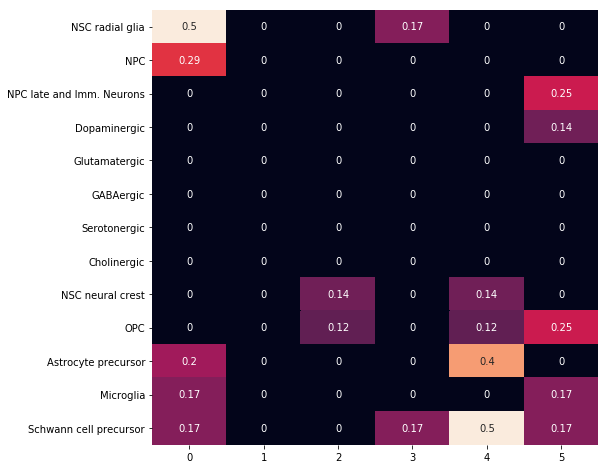

In [11]:
#Overlap with newer marker gene sets
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_groups_r0.2', normalize='reference'), cbar=False, annot=True)

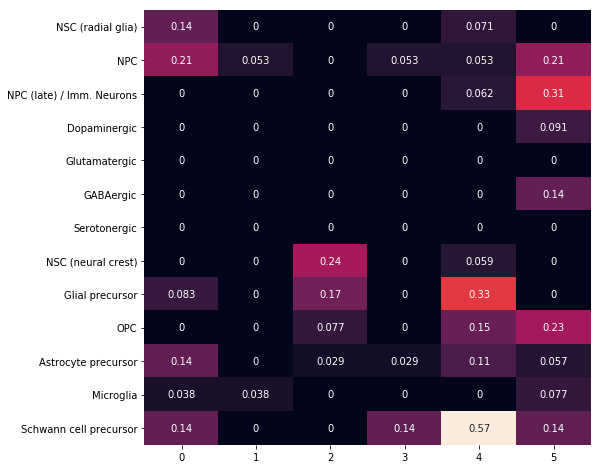

In [12]:
#Overlap with older marker gene sets
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_groups_r0.2', normalize='reference'), cbar=False, annot=True)

computing score 'score'
    finished (0:00:21)
computing score 'score'
    finished (0:00:27)
computing score 'score'
    finished (0:00:22)
computing score 'score'
    finished (0:00:18)
computing score 'score'
    finished (0:00:18)
computing score 'score'
    finished (0:00:17)
computing score 'score'
    finished (0:00:17)
computing score 'score'
    finished (0:00:17)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:17)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)


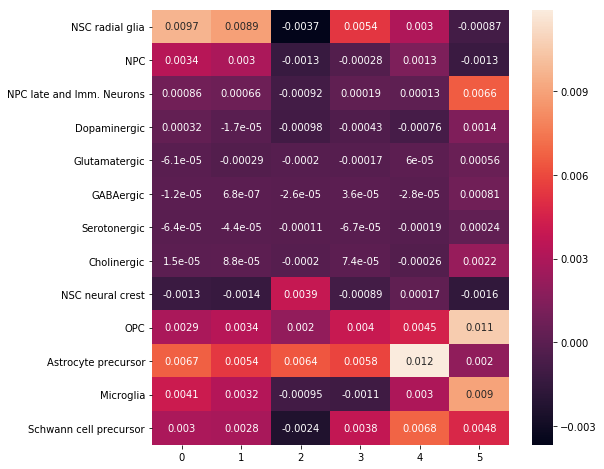

In [13]:
#Score of newer marker gene sets
groups = adata.obs['louvain_r0.2'].cat.categories
df = np.zeros((len(marker_genes_2), len(groups)))
i=-1
for marker in marker_genes_2:
    i+=1
    sc.tl.score_genes(adata, marker_genes_2[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2'] == group])
        j += 1
cells = marker_genes_2.keys()
res = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(res, annot = True)

computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:13)
computing score 'score'
    finished (0:00:14)
computing score 'score'
    finished (0:00:15)
computing score 'score'
    finished (0:00:15)


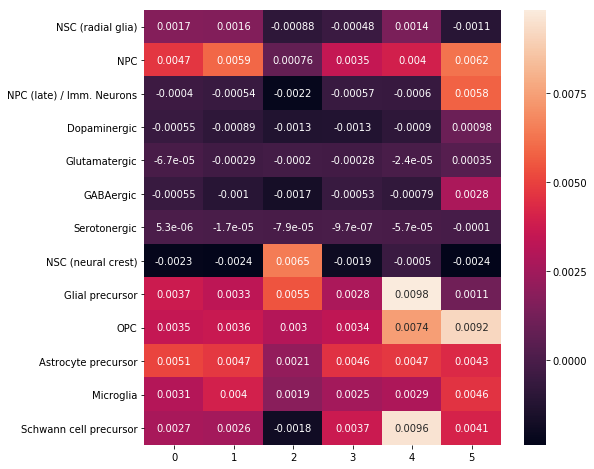

In [14]:
#Score of older marker gene sets
groups = adata.obs['louvain_r0.2'].cat.categories
df = np.zeros((len(marker_genes), len(groups)))
i=-1
for marker in marker_genes:
    i+=1
    sc.tl.score_genes(adata, marker_genes[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2'] == group])
        j += 1
cells = marker_genes.keys()
res = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(res, annot = True)

Marker-determined cluster assignment:

- 0: NPCs
- 1: NPC (early?)
- 2: Neural crest NPCs and some glial precursors
- 3: Astro prec and NPC?
- 4: Glial precursors (OPC & Schwann)
- 5: NPC (late)

# Gene set enrichment on marker genes

In [15]:
#GO:BP enrichment of marker gene sets for further support of cluster annotation
pd.set_option("display.max_colwidth", 800)

for i in [str(i) for i in range(6)]:
    print(f"Cluster {i}:")
    clust_enrichment = gprofiler(adata.uns['rank_genes_groups_r0.2']['names'][i], custom_bg=adata.var_names.tolist(), organism='hsapiens', correction_method='fdr', src_filter=['GO:BP'])
    clust_enrichment = clust_enrichment.sort_values('p.value').iloc[:,[2,3,5,6,11]]
    clust_enrichment.iloc[:50,:]
    print("")

Cluster 0:


p.value  term.size  overlap.size  recall  \
term.id                                                 
GO:0032501  0.000593       5529            59   0.615   
GO:2000026  0.000593       1636            29   0.302   
GO:0050793  0.000593       2101            32   0.333   
GO:0009887  0.000593        822            19   0.198   
GO:0022610  0.001130       1068            21   0.219   
GO:0007155  0.001130       1064            21   0.219   
GO:0051094  0.001260       1130            21   0.219   
GO:0045595  0.001260       1484            25   0.260   
GO:0051960  0.001260        775            17   0.177   
GO:0051093  0.001260        774            17   0.177   
GO:0016477  0.001260       1099            21   0.219   
GO:0048870  0.001260       1208            22   0.229   
GO:0006928  0.001260       1622            26   0.271   
GO:0040011  0.001260       1399            24   0.250   
GO:0051961  0.001260        256            10   0.104   
GO:0051674  0.001260       1208            22   0.229   
GO:0045597  0.001860        810            17   0.177   
GO:0048731  0.001860       3840            44   0.458   
GO:0048513  0.001920       2713            35   0.365   
GO:0007275  0.002250       4285            47   0.490   
GO:0051239  0.002250       2385            32   0.333   
GO:0042063  0.002420        237             9   0.094   
GO:0007417  0.002440        841            17   0.177   
GO:0060322  0.002600        677            15   0.156   
GO:0007399  0.002640       2077            29   0.302   
GO:0050767  0.003280        695            15   0.156   
GO:0048856  0.003280       4659            49   0.510   
GO:0009888  0.003280       1457            23   0.240   
GO:0032502  0.004190       4989            51   0.531   
GO:0007420  0.004580        637            14   0.146   
GO:0030900  0.004700        334            10   0.104   
GO:0007166  0.006020       2310            30   0.312   
GO:0045596  0.006500        579            13   0.135   
GO:0030030  0.007550       1342            21   0.219   
GO:0050896  0.007980       6784            62   0.646   
GO:0072139  0.009280          3             2   0.021   
GO:0098609  0.009510        607            13   0.135   
GO:0048519  0.009780       4326            45   0.469   
GO:0010001  0.009910        178             7   0.073   
GO:0050768  0.009910        239             8   0.083   
GO:0060284  0.009910        790            15   0.156   
GO:0009653  0.009910       2163            28   0.292   
GO:0030901  0.010200         80             5   0.052   
GO:0060429  0.010200        890            16   0.167   
GO:0042221  0.010200       3416            38   0.396   
GO:0120036  0.012800       1313            20   0.208   
GO:0009794  0.013800          4             2   0.021   
GO:0045448  0.013800          4             2   0.021   
GO:0051240  0.013800       1328            20   0.208   
GO:0030154  0.013800       3219            36   0.375   

                                                             term.name  
term.id                                                                 
GO:0032501                            multicellular organismal process  
GO:2000026          regulation of multicellular organismal development  
GO:0050793                         regulation of developmental process  
GO:0009887                                  animal organ morphogenesis  
GO:0022610                                         biological adhesion  
GO:0007155                                               cell adhesion  
GO:0051094                positive regulation of developmental process  
GO:0045595                          regulation of cell differentiation  
GO:0051960                    regulation of nervous system development  
GO:0051093                negative regulation of developmental process  
GO:0016477                                              cell migration  
GO:0048870                                               cell motility  
GO:0006928                


Cluster 1:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0051301  1.820000e-59        547            61   0.616   
GO:0007059  4.790000e-55        290            49   0.495   
GO:0000278  1.770000e-51        882            64   0.646   
GO:0007049  4.410000e-51       1608            76   0.768   
GO:1903047  4.950000e-51        724            60   0.606   
GO:0140014  2.480000e-48        248            43   0.434   
GO:0000280  2.310000e-47        361            47   0.475   
GO:0022402  3.740000e-45       1126            64   0.646   
GO:0000819  4.110000e-45        169            37   0.374   
GO:0048285  4.110000e-45        404            47   0.475   
GO:0000070  3.950000e-44        145            35   0.354   
GO:0098813  4.580000e-43        232            39   0.394   
GO:0051276  6.270000e-39       1063            58   0.586   
GO:0051726  1.360000e-28       1046            49   0.495   
GO:0051983  5.600000e-27         92            22   0.222   
GO:0006996  3.660000e-26       3398            74   0.747   
GO:0010564  3.770000e-25        626            38   0.384   
GO:0007017  5.500000e-25        681            39   0.394   
GO:0007051  6.790000e-25        153            24   0.242   
GO:0007346  3.040000e-24        571            36   0.364   
GO:1902850  4.030000e-24        122            22   0.222   
GO:0007052  1.070000e-22        101            20   0.202   
GO:0051783  1.480000e-22        166            23   0.232   
GO:0000226  2.490000e-22        469            32   0.323   
GO:0044772  2.590000e-22        470            32   0.323   
GO:0007088  3.050000e-22        148            22   0.222   
GO:0044770  2.000000e-21        503            32   0.323   
GO:0010965  1.050000e-19         51            15   0.152   
GO:0051306  2.740000e-19         54            15   0.152   
GO:1905818  3.660000e-19         55            15   0.152   
GO:0033047  2.060000e-18         61            15   0.152   
GO:0051304  2.540000e-18         78            16   0.162   
GO:0007091  3.520000e-18         49            14   0.141   
GO:0044784  4.670000e-18         50            14   0.141   
GO:0006323  4.670000e-18        171            20   0.202   
GO:0033045  2.760000e-17         72            15   0.152   
GO:0008608  5.300000e-17         33            12   0.121   
GO:0071103  1.080000e-16        233            21   0.212   
GO:0030071  1.080000e-16         47            13   0.131   
GO:0031145  1.150000e-16         35            12   0.121   
GO:1902099  1.420000e-16         48            13   0.131   
GO:1901990  7.710000e-16        333            23   0.232   
GO:0051321  2.340000e-15        203            19   0.192   
GO:1901987  4.700000e-15        362            23   0.232   
GO:2000816  5.890000e-15         34            11   0.111   
GO:1905819  5.890000e-15         34            11   0.111   
GO:0016043  7.280000e-15       5434            76   0.768   
GO:0034508  1.300000e-14         50            12   0.121   
GO:0033048  1.630000e-14         37            11   0.111   
GO:0033046  2.990000e-14         39            11   0.111   

                                                                         term.name  
term.id                                                                             
GO:0051301                                                           cell division  
GO:0007059                                                  chromosome segregation  
GO:0000278                                                      mitotic cell cycle  
GO:0007049                                                              cell cycle  
GO:1903047                                              mitotic cell cycle process  
GO:0140014                                                mitotic nuclear division  
GO:0000280                                                        nuclear division  
GO:0022402                                                      cell cycle proc


Cluster 2:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0006614  5.420000e-77         92            46   0.474   
GO:0006613  1.370000e-75         98            46   0.474   
GO:0045047  5.760000e-75        101            46   0.474   
GO:0072599  4.470000e-74        105            46   0.474   
GO:0000184  7.350000e-71        120            46   0.474   
GO:0070972  4.090000e-70        124            46   0.474   
GO:0006612  5.480000e-64        161            46   0.474   
GO:0006413  1.810000e-62        188            47   0.485   
GO:0000956  3.540000e-59        200            46   0.474   
GO:0006402  5.330000e-53        289            47   0.485   
GO:0090150  1.410000e-52        272            46   0.474   
GO:0006401  7.210000e-51        320            47   0.485   
GO:0006605  1.090000e-45        379            46   0.474   
GO:0034655  3.260000e-43        495            48   0.495   
GO:0046700  5.980000e-42        526            48   0.495   
GO:0044270  7.540000e-42        529            48   0.495   
GO:0019439  1.880000e-41        540            48   0.495   
GO:0072594  1.880000e-41        503            47   0.485   
GO:1901361  1.050000e-40        560            48   0.495   
GO:0072657  1.470000e-39        515            46   0.474   
GO:0006412  1.800000e-39        595            48   0.495   
GO:0043043  7.860000e-39        614            48   0.495   
GO:0006518  2.490000e-35        729            48   0.495   
GO:0043604  2.490000e-35        729            48   0.495   
GO:0016071  4.040000e-35        737            48   0.495   
GO:0033365  1.840000e-33        800            48   0.495   
GO:0006886  1.800000e-30        929            48   0.495   
GO:0043603  4.240000e-30        947            48   0.495   
GO:0044265  2.030000e-27       1024            47   0.485   
GO:0009057  2.630000e-27       1219            50   0.515   
GO:0002181  9.050000e-26         90            21   0.216   
GO:1901566  1.450000e-25       1623            54   0.557   
GO:0010629  1.570000e-25       1550            53   0.546   
GO:0048519  3.650000e-22       4326            76   0.784   
GO:0010605  4.040000e-22       2270            58   0.598   
GO:1901575  1.060000e-21       1781            52   0.536   
GO:0034613  3.410000e-21       1583            49   0.505   
GO:0070727  4.290000e-21       1592            49   0.505   
GO:0015031  4.990000e-21       1678            50   0.515   
GO:0015833  9.500000e-21       1703            50   0.515   
GO:0042886  1.390000e-20       1719            50   0.515   
GO:0046907  1.560000e-20       1564            48   0.495   
GO:0009892  1.560000e-20       2445            58   0.598   
GO:0045184  5.920000e-20       1780            50   0.515   
GO:0071705  3.860000e-19       1946            51   0.526   
GO:0044248  1.690000e-18       1923            50   0.515   
GO:0009056  3.620000e-18       2139            52   0.536   
GO:0042254  5.660000e-18        273            23   0.237   
GO:0071702  6.280000e-18       2261            53   0.546   
GO:0051649  2.210000e-17       1864            48   0.495   

                                                                                 term.name  
term.id                                                                                     
GO:0006614                     SRP-dependent cotranslational protein targeting to membrane  
GO:0006613                                   cotranslational protein targeting to membrane  
GO:0045047                                                         protein targeting to ER  
GO:0072599                  establishment of protein localization to endoplasmic reticulum  
GO:0000184             nuclear-transcribed mRNA catabolic process, nonsense-mediated decay  
GO:0070972                                   protein localization to endoplasmic reticulum  
GO:0006612                                                   protein targeting to membrane  
GO:0006


Cluster 3:


p.value  term.size  overlap.size  recall  \
term.id                                                      
GO:0006614  8.880000e-108         92            58   0.586   
GO:0006613  1.200000e-105         98            58   0.586   
GO:0045047  1.070000e-104        101            58   0.586   
GO:0072599  2.130000e-103        105            58   0.586   
GO:0000184   6.920000e-99        120            58   0.586   
GO:0070972   7.640000e-98        124            58   0.586   
GO:0006612   1.490000e-89        161            58   0.586   
GO:0000956   2.800000e-85        200            59   0.596   
GO:0006413   5.640000e-85        188            58   0.586   
GO:0006402   1.090000e-76        289            60   0.606   
GO:0090150   1.860000e-76        272            59   0.596   
GO:0006401   7.950000e-74        320            60   0.606   
GO:0006605   1.950000e-65        379            58   0.586   
GO:0034655   3.270000e-65        495            62   0.626   
GO:0046700   1.510000e-63        526            62   0.626   
GO:0044270   2.080000e-63        529            62   0.626   
GO:0019439   7.520000e-63        540            62   0.626   
GO:1901361   7.470000e-62        560            62   0.626   
GO:0072657   8.040000e-61        515            60   0.606   
GO:0006412   1.420000e-58        595            61   0.616   
GO:0072594   3.910000e-58        503            58   0.586   
GO:0043043   9.470000e-58        614            61   0.616   
GO:0006518   1.100000e-54        729            62   0.626   
GO:0016071   2.120000e-54        737            62   0.626   
GO:0043604   3.590000e-53        729            61   0.616   
GO:0033365   9.120000e-48        800            59   0.596   
GO:0043603   1.160000e-47        947            62   0.626   
GO:0044265   1.370000e-45       1024            62   0.626   
GO:0006886   1.220000e-42        929            58   0.586   
GO:0046907   5.920000e-42       1564            68   0.687   
GO:0009057   4.840000e-41       1219            62   0.626   
GO:1901566   6.460000e-41       1623            68   0.687   
GO:0010629   1.900000e-38       1550            65   0.657   
GO:0051649   3.210000e-38       1864            69   0.697   
GO:0051641   6.130000e-36       2469            74   0.747   
GO:0044248   5.410000e-35       1923            67   0.677   
GO:1901575   9.300000e-35       1781            65   0.657   
GO:0034613   2.350000e-34       1583            62   0.626   
GO:0070727   3.210000e-34       1592            62   0.626   
GO:0002181   5.120000e-33         90            25   0.253   
GO:0009056   4.020000e-32       2139            67   0.677   
GO:0015031   8.810000e-32       1678            61   0.616   
GO:0010605   1.300000e-31       2270            68   0.687   
GO:0015833   1.990000e-31       1703            61   0.616   
GO:0042886   3.330000e-31       1719            61   0.616   
GO:0009892   1.160000e-30       2445            69   0.697   
GO:0045184   2.360000e-30       1780            61   0.616   
GO:0071705   2.740000e-30       1946            63   0.636   
GO:0006810   3.800000e-27       4072            80   0.808   
GO:0071702   1.500000e-26       2261            63   0.636   

                                                                                term.name  
term.id                                                                                    
GO:0006614                    SRP-dependent cotranslational protein targeting to membrane  
GO:0006613                                  cotranslational protein targeting to membrane  
GO:0045047                                                        protein targeting to ER  
GO:0072599                 establishment of protein localization to endoplasmic reticulum  
GO:0000184            nuclear-transcribed mRNA catabolic process, nonsense-mediated decay  
GO:0070972                                  protein localization to endoplasmic reticulum  
GO:0006612                                               


Cluster 4:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0048666  9.380000e-07        960            25   0.258   
GO:0022008  1.100000e-06       1395            30   0.309   
GO:0007399  1.140000e-06       2077            37   0.381   
GO:0031175  1.450000e-06        851            23   0.237   
GO:0048731  1.450000e-06       3840            52   0.536   
GO:0048856  1.530000e-06       4659            58   0.598   
GO:0048870  1.650000e-06       1208            27   0.278   
GO:0051674  1.650000e-06       1208            27   0.278   
GO:0048468  1.650000e-06       1757            33   0.340   
GO:0009653  1.650000e-06       2163            37   0.381   
GO:0040011  1.940000e-06       1399            29   0.299   
GO:0007275  3.820000e-06       4285            54   0.557   
GO:0016477  3.820000e-06       1099            25   0.258   
GO:0030182  3.820000e-06       1183            26   0.268   
GO:0000902  4.160000e-06        865            22   0.227   
GO:0032502  4.160000e-06       4989            59   0.608   
GO:0051239  4.570000e-06       2385            38   0.392   
GO:0048699  5.770000e-06       1309            27   0.278   
GO:0050793  6.440000e-06       2101            35   0.361   
GO:0048869  8.030000e-06       3381            46   0.474   
GO:0032501  8.030000e-06       5529            62   0.639   
GO:0001568  1.320000e-05        559            17   0.175   
GO:0061564  1.490000e-05        433            15   0.155   
GO:0032989  1.530000e-05        950            22   0.227   
GO:0030154  1.530000e-05       3219            44   0.454   
GO:0001944  2.200000e-05        585            17   0.175   
GO:0010001  2.490000e-05        178            10   0.103   
GO:0006928  2.490000e-05       1622            29   0.299   
GO:0072358  2.500000e-05        594            17   0.175   
GO:0000904  3.850000e-05        615            17   0.175   
GO:0042063  3.850000e-05        237            11   0.113   
GO:0009605  3.900000e-05       1667            29   0.299   
GO:0035239  3.940000e-05        693            18   0.186   
GO:0048514  4.710000e-05        486            15   0.155   
GO:0048812  5.020000e-05        559            16   0.165   
GO:0048667  6.420000e-05        500            15   0.155   
GO:0120039  6.640000e-05        573            16   0.165   
GO:0048858  6.950000e-05        576            16   0.165   
GO:0050673  7.280000e-05        315            12   0.124   
GO:0072359  7.730000e-05        897            20   0.206   
GO:0048646  8.500000e-05        905            20   0.206   
GO:0001935  8.710000e-05        121             8   0.082   
GO:0032990  9.350000e-05        595            16   0.165   
GO:0050678  1.100000e-04        273            11   0.113   
GO:0007409  1.200000e-04        398            13   0.134   
GO:0035295  1.290000e-04        852            19   0.196   
GO:0001525  1.450000e-04        407            13   0.134   
GO:0120036  1.500000e-04       1313            24   0.247   
GO:0097435  1.680000e-04        554            15   0.155   
GO:2000026  2.020000e-04       1636            27   0.278   

                                                               term.name  
term.id                                                                   
GO:0048666                                            neuron development  
GO:0022008                                                  neurogenesis  
GO:0007399                                    nervous system development  
GO:0031175                                 neuron projection development  
GO:0048731                                            system development  
GO:0048856                              anatomical structure development  
GO:0048870                                                 cell motility  
GO:0051674                                          localization of cell  
GO:0048468                                              cell development  
GO:0009653         


Cluster 5:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0007399  2.620000e-11       2077            45   0.459   
GO:0030182  1.330000e-10       1183            33   0.337   
GO:0048666  1.330000e-10        960            30   0.306   
GO:0031175  2.420000e-10        851            28   0.286   
GO:0048699  2.940000e-10       1309            34   0.347   
GO:0022008  1.290000e-09       1395            34   0.347   
GO:0048812  2.300000e-09        559            22   0.224   
GO:0120039  3.450000e-09        573            22   0.224   
GO:0048858  3.540000e-09        576            22   0.224   
GO:0120036  5.150000e-09       1313            32   0.327   
GO:0032990  5.830000e-09        595            22   0.224   
GO:0030030  8.000000e-09       1342            32   0.327   
GO:0048667  1.020000e-08        500            20   0.204   
GO:0061564  5.410000e-08        433            18   0.184   
GO:0048468  7.680000e-08       1757            35   0.357   
GO:0007409  1.080000e-07        398            17   0.173   
GO:0000904  3.090000e-07        615            20   0.204   
GO:0050768  6.310000e-07        239            13   0.133   
GO:0030154  6.310000e-07       3219            47   0.480   
GO:0051961  1.200000e-06        256            13   0.133   
GO:0048731  1.880000e-06       3840            51   0.520   
GO:0010721  2.200000e-06        271            13   0.133   
GO:0048869  2.480000e-06       3381            47   0.480   
GO:0000902  2.670000e-06        865            22   0.224   
GO:0007275  2.850000e-06       4285            54   0.551   
GO:0032501  8.060000e-06       5529            62   0.633   
GO:0120035  1.100000e-05        566            17   0.173   
GO:0045664  1.130000e-05        568            17   0.173   
GO:0060284  1.150000e-05        790            20   0.204   
GO:0032989  1.150000e-05        950            22   0.224   
GO:0031344  1.230000e-05        574            17   0.173   
GO:0031346  1.900000e-05        335            13   0.133   
GO:0030307  2.190000e-05        140             9   0.092   
GO:1990138  2.240000e-05        141             9   0.092   
GO:0032594  2.650000e-05         24             5   0.051   
GO:0048588  2.690000e-05        189            10   0.102   
GO:0048639  2.850000e-05        146             9   0.092   
GO:0050772  2.850000e-05         73             7   0.071   
GO:0050767  2.950000e-05        695            18   0.184   
GO:0048856  3.780000e-05       4659            54   0.551   
GO:0010975  3.780000e-05        425            14   0.143   
GO:0010976  3.780000e-05        249            11   0.112   
GO:0045666  8.400000e-05        329            12   0.122   
GO:0045927  8.890000e-05        219            10   0.102   
GO:0007417  9.530000e-05        841            19   0.194   
GO:0010720  9.900000e-05        465            14   0.143   
GO:0010770  1.090000e-04        130             8   0.082   
GO:0051960  1.190000e-04        775            18   0.184   
GO:0032502  1.290000e-04       4989            55   0.561   
GO:0050794  1.330000e-04       8601            78   0.796   

                                                                            term.name  
term.id                                                                                
GO:0007399                                                 nervous system development  
GO:0030182                                                     neuron differentiation  
GO:0048666                                                         neuron development  
GO:0031175                                              neuron projection development  
GO:0048699                                                      generation of neurons  
GO:0022008                                                               neurogenesis  
GO:0048812                                            neuron projection morphogenesis  
GO:0120039                      plasma membrane boun

Glial precursors have neurogenesis processes enriched in their marker genes (Cluster 4, which are allegedly OPC and Schwann cell precursors - myelinating glial cells). However, this enrichment is most clear in cluster 5, which is later stage NPCs.

NPCs and astro precursor clusters seem to be at an earlier stage of differentiation, as they mainly have metabolic activity markers.


- Cluster 0: Early stage NPCs, with also glial development annotations highly enriched. OPC development is enriched as well as general glial cell developmental processes.
- Cluster 1: Dominated by cell cycle effects. Seem to be proliferating NPCs/stem cells.
- Cluster 2: Enriched for translation and metabolic processes. Little information about cell type.
- Cluster 3: Again translation and metabolic processes. Little info about cell type.
- Cluster 4: Difficult cluster: enriched for "neuron development, "generation of neurons", but also "blood vessel development", and "blood vessel morphogenesis". Epithelial cell regulation and proliferation functions are further enriched. This could be astrocytes, which are involved with epithelial cell regulation and blood flow in the brain. Unsure whether this is a role astrocytes have at such early stages though. Maybe these are endothelial cells? Or endothelial cell progenitors? Do we expect these cells?
- Cluster 5: Clearly later stage NPCs, as they have synaptic vesicle transport upregulated, and other neurogenesis functions

## Potential cluster assignment:

Potential cluster assignment:

- 0: NPCs & glial precursors (branching point state)
- 1: Stem cells / NPCs
- 2: Neural crest cells
- 3: Glial precursors (Astro) (?)
- 4: Glial precursors (OPC & Schwann) (?)
- 5: NPC (late)


But:
- metabolic process enrichment could be related to glial cells like astrocytes, so cluster 2 may contain other cells as well?
- Maybe the non-HVG initial clustering was better?

## Revised cluster assignment:

- 0: Neural stem cells (NSC)
- 1: Neural stem cells (NSC) - proliferating
- 2: Neural crest cells (NCSC)
- 3: Unknown (glial)
- 4: Glial precursors (myelinating)
- 5: Neural precursor cell / immature neuron

## Subclustering

Subcluster clusters 0, and 4

### Cluster 0

In [16]:
sc.tl.louvain(adata, restrict_to=('louvain_r0.2', ['0']), resolution=0.2, key_added='louvain_r0.2_0_sub')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:01)


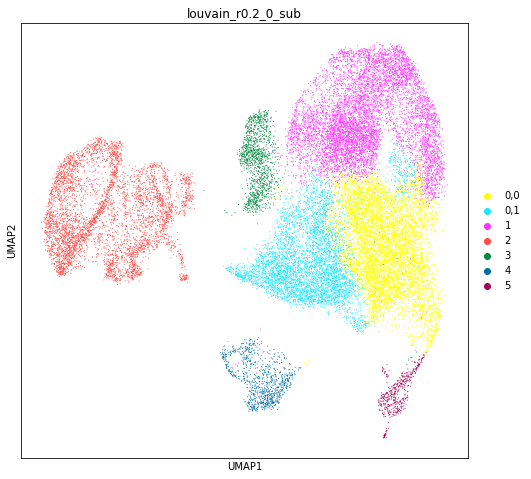

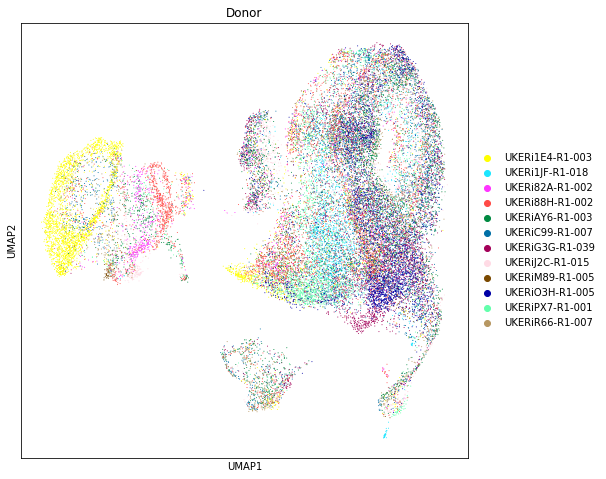

In [17]:
#Show the new clustering
sc.pl.umap(adata, color='louvain_r0.2_0_sub', palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color='Donor', palette=sc.pl.palettes.godsnot_64)

In [18]:
#Get the new marker genes
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.2_0_sub', key_added='rank_genes_r0.2_0_sub')

ranking genes
    finished (0:00:47)


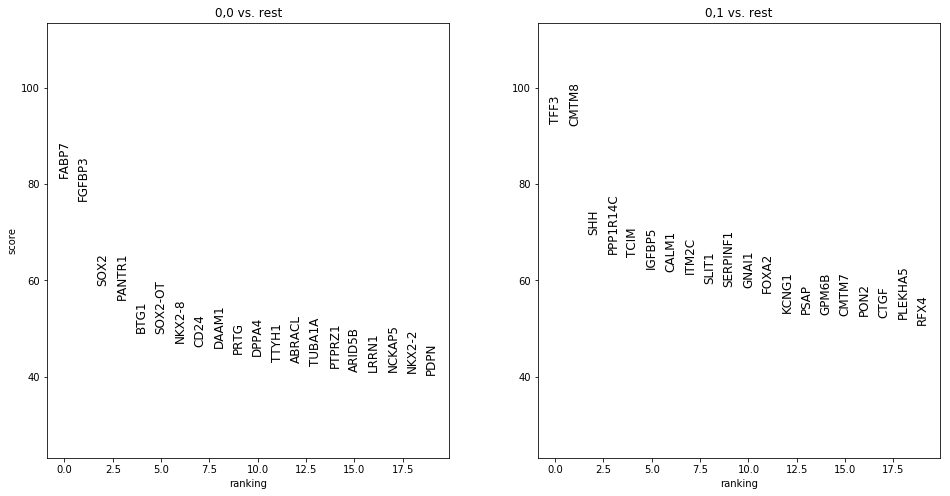

In [19]:
#Plot the new marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes_r0.2_0_sub', groups=['0,0','0,1'], fontsize=12)

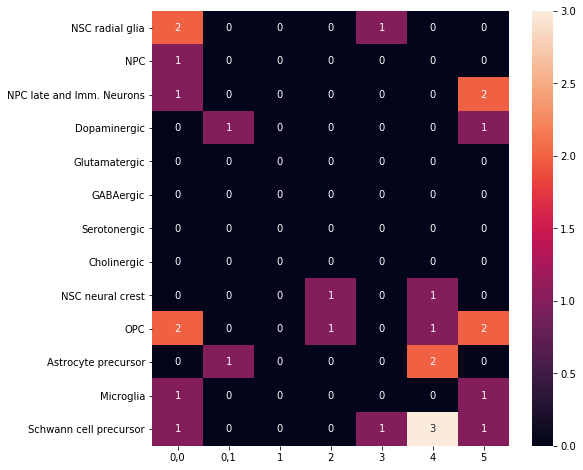

In [20]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_sub', normalize='None'), annot = True)

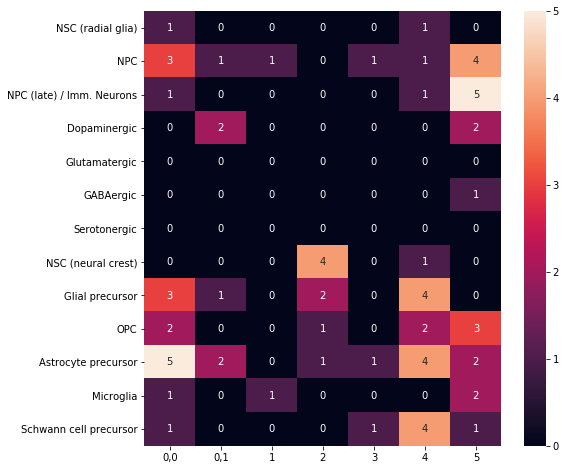

In [21]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_sub', normalize='None'), annot = True)

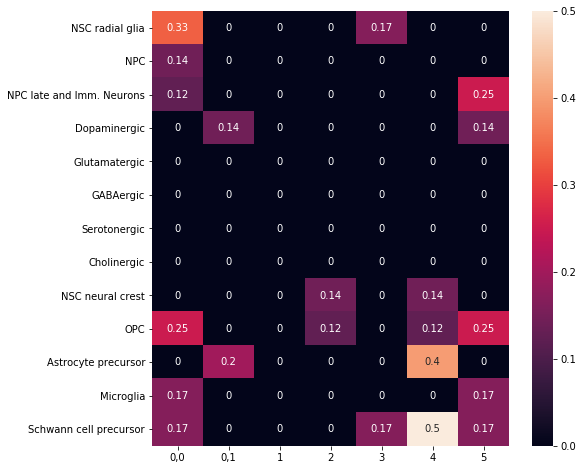

In [22]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_sub', normalize='reference'), annot = True)

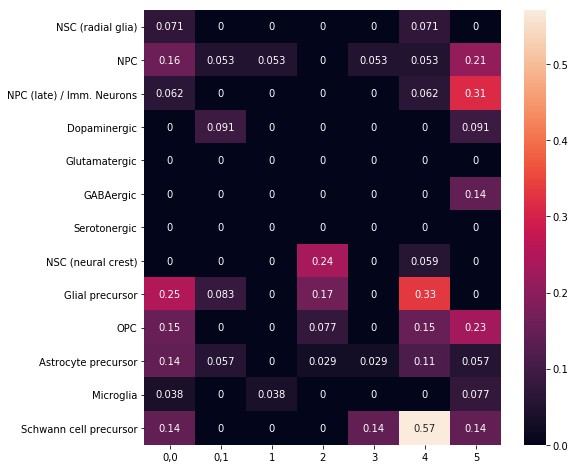

In [23]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_sub', normalize='reference'), annot = True)

computing score 'score'
    finished (0:00:12)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:08)


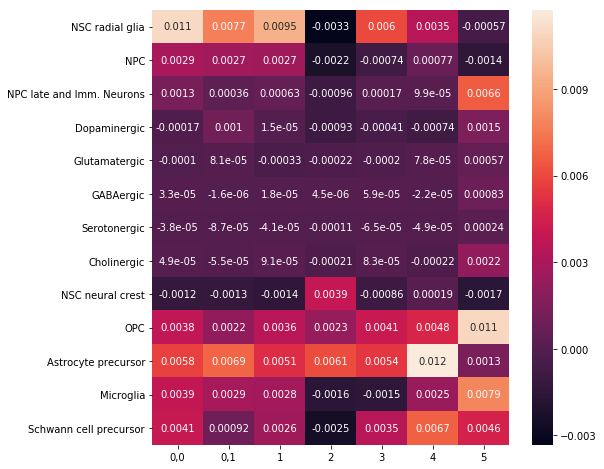

In [24]:
groups = adata.obs['louvain_r0.2_0_sub'].cat.categories
df = np.zeros((len(marker_genes_2), len(groups)))
i=-1
for marker in marker_genes_2:
    i+=1
    sc.tl.score_genes(adata, marker_genes_2[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_sub'] == group])
        j += 1
cells = marker_genes_2.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:20)
computing score 'score'
    finished (0:00:29)
computing score 'score'
    finished (0:00:25)
computing score 'score'
    finished (0:00:17)
computing score 'score'
    finished (0:00:21)
computing score 'score'
    finished (0:00:17)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)
computing score 'score'
    finished (0:00:16)


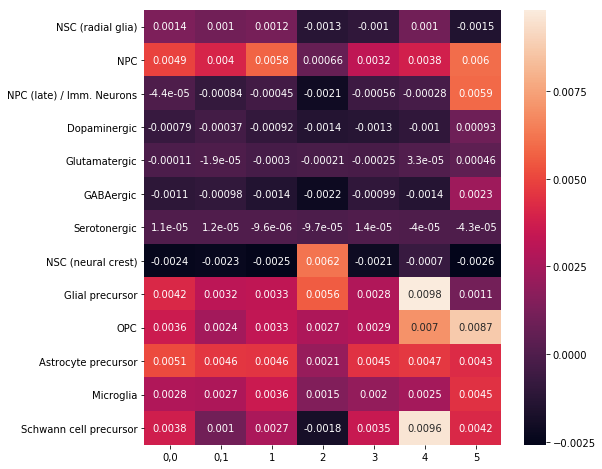

In [25]:
groups = adata.obs['louvain_r0.2_0_sub'].cat.categories
df = np.zeros((len(marker_genes), len(groups)))
i=-1
for marker in marker_genes:
    i+=1
    sc.tl.score_genes(adata, marker_genes[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_sub'] == group])
        j += 1
cells = marker_genes.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

In [26]:
#GO:BP enrichment of marker gene sets for further support of cluster annotation
pd.set_option("display.max_colwidth", 800)

for i in ['0,0', '0,1']:
    print(f"Cluster {i}:")
    clust_enrichment = gprofiler(adata.uns['rank_genes_r0.2_0_sub']['names'][i], custom_bg=adata.var_names.tolist(), organism='hsapiens', correction_method='fdr', src_filter=['GO:BP'])
    clust_enrichment = clust_enrichment.sort_values('p.value').iloc[:,[2,3,5,6,11]]
    clust_enrichment.iloc[:50,:]
    print("")

Cluster 0,0:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0032501  6.330000e-11       5529            70   0.761   
GO:0051239  2.430000e-10       2385            45   0.489   
GO:0032502  2.640000e-10       4989            65   0.707   
GO:2000026  2.640000e-10       1636            37   0.402   
GO:0051960  1.510000e-09        775            25   0.272   
GO:0045595  1.510000e-09       1484            34   0.370   
GO:0048709  1.510000e-09         83            11   0.120   
GO:0051961  1.510000e-09        256            16   0.174   
GO:0010001  1.510000e-09        178            14   0.152   
GO:0007275  1.940000e-09       4285            58   0.630   
GO:0050793  1.940000e-09       2101            40   0.435   
GO:0045165  3.810000e-09        195            14   0.152   
GO:0050768  3.940000e-09        239            15   0.163   
GO:0048856  3.940000e-09       4659            60   0.652   
GO:0048731  4.070000e-09       3840            54   0.587   
GO:0050767  4.440000e-09        695            23   0.250   
GO:0007417  4.710000e-09        841            25   0.272   
GO:0045596  6.400000e-09        579            21   0.228   
GO:0048663  6.560000e-09         54             9   0.098   
GO:0030182  6.930000e-09       1183            29   0.315   
GO:0060284  6.930000e-09        790            24   0.261   
GO:0007399  1.310000e-08       2077            38   0.413   
GO:0010721  1.310000e-08        271            15   0.163   
GO:0022008  1.310000e-08       1395            31   0.337   
GO:0048699  1.310000e-08       1309            30   0.326   
GO:0001708  2.150000e-08         64             9   0.098   
GO:0051241  2.150000e-08        924            25   0.272   
GO:0042063  2.150000e-08        237            14   0.152   
GO:0051093  2.150000e-08        774            23   0.250   
GO:0048513  3.060000e-08       2713            43   0.467   
GO:0007166  5.440000e-08       2310            39   0.424   
GO:0035270  1.210000e-07        108            10   0.109   
GO:0051094  2.340000e-07       1130            26   0.283   
GO:0051240  3.230000e-07       1328            28   0.304   
GO:0030154  4.980000e-07       3219            45   0.489   
GO:0048468  5.790000e-07       1757            32   0.348   
GO:0048519  7.270000e-07       4326            53   0.576   
GO:0045664  8.000000e-07        568            18   0.196   
GO:0045665  1.730000e-06        187            11   0.120   
GO:0048869  2.150000e-06       3381            45   0.489   
GO:0050673  5.310000e-06        315            13   0.141   
GO:0045687  5.390000e-06         35             6   0.065   
GO:0048523  5.400000e-06       3886            48   0.522   
GO:0021510  5.610000e-06         89             8   0.087   
GO:0014013  8.430000e-06         94             8   0.087   
GO:0060322  9.610000e-06        677            18   0.196   
GO:0016477  9.800000e-06       1099            23   0.250   
GO:0007409  9.800000e-06        398            14   0.152   
GO:0000904  1.230000e-05        615            17   0.185   
GO:0007420  1.980000e-05        637            17   0.185   

                                                              term.name  
term.id                                                                  
GO:0032501                             multicellular organismal process  
GO:0051239               regulation of multicellular organismal process  
GO:0032502                                        developmental process  
GO:2000026           regulation of multicellular organismal development  
GO:0051960                     regulation of nervous system development  
GO:0045595                           regulation of cell differentiation  
GO:0048709                              oligodendrocyte differentiation  
GO:0051961            negative regulation of nervous system development  
GO:0010001                                   glial cell differentiation  
GO:0007275                    


Cluster 0,1:


p.value  term.size  overlap.size  recall  \
term.id                                                 
GO:0048513  0.000016       2713            41   0.427   
GO:0009888  0.000047       1457            28   0.292   
GO:0007275  0.000072       4285            52   0.542   
GO:0048731  0.000116       3840            48   0.500   
GO:0032501  0.000116       5529            60   0.625   
GO:0048856  0.000116       4659            54   0.562   
GO:0051093  0.000127        774            19   0.198   
GO:0032502  0.000127       4989            56   0.583   
GO:0022612  0.000897        100             7   0.073   
GO:0030850  0.001450         41             5   0.052   
GO:0022028  0.001850          7             3   0.031   
GO:0030901  0.002420         80             6   0.062   
GO:0002376  0.002540       2119            30   0.312   
GO:0030154  0.002700       3219            39   0.406   
GO:0038092  0.002900          9             3   0.031   
GO:0051239  0.002900       2385            32   0.333   
GO:0048869  0.002900       3381            40   0.417   
GO:0051241  0.002900        924            18   0.188   
GO:0048732  0.002900        366            11   0.115   
GO:2000026  0.003140       1636            25   0.260   
GO:0030030  0.003510       1342            22   0.229   
GO:0071542  0.003510         29             4   0.042   
GO:0043062  0.003810        320            10   0.104   
GO:0060738  0.003950          2             2   0.021   
GO:0050896  0.004150       6784            63   0.656   
GO:0061448  0.005520        210             8   0.083   
GO:0040007  0.005990        829            16   0.167   
GO:0003002  0.006900        282             9   0.094   
GO:0016049  0.007210        427            11   0.115   
GO:0050793  0.007210       2101            28   0.292   
GO:0007389  0.008130        361            10   0.104   
GO:0009798  0.008440         74             5   0.052   
GO:0032940  0.009120       1163            19   0.198   
GO:0007155  0.009120       1064            18   0.188   
GO:0022610  0.009330       1068            18   0.188   
GO:0009653  0.009860       2163            28   0.292   
GO:0060429  0.010400        890            16   0.167   
GO:0040011  0.011100       1399            21   0.219   
GO:0006928  0.011700       1622            23   0.240   
GO:0048646  0.011900        905            16   0.167   
GO:0120036  0.012800       1313            20   0.208   
GO:1900164  0.013000          4             2   0.021   
GO:0071504  0.013000          4             2   0.021   
GO:1901862  0.013000         47             4   0.042   
GO:0071503  0.013000          4             2   0.021   
GO:0031290  0.013000         19             3   0.031   
GO:1900094  0.013000          4             2   0.021   
GO:0031017  0.013000          4             2   0.021   
GO:0038107  0.013000          4             2   0.021   
GO:0030097  0.013600        657            13   0.135   

                                                                                                                  term.name  
term.id                                                                                                                      
GO:0048513                                                                                         animal organ development  
GO:0009888                                                                                               tissue development  
GO:0007275                                                                               multicellular organism development  
GO:0048731                                                                                               system development  
GO:0032501                                                                                 multicellular organismal process  
GO:0048856                                                                                 anatomical structure development  
GO:0051093                              

- Cluster 0,0: Has glial cell differentiation (specifically oligos) and neurogenesis terms specifically enriched. More terms are neuron related, but glial terms have fewer associated proteins, so enrichment is more significant. Even have "neuron fate commitment" term, suggesting later NPCs.
- Cluster 0,1: More immune response terms enriched, and general development (also midbrain). Further have specific dopaminergic neuron development term enriched (based on 4 out of 100 marker genes)

Overall it's difficult to say whether this separation brings more information or not.

Consideration of marker genes:
- Cluster 0,0: More Wnt signaling markers
- Cluster 0,1: Shh signaling markers

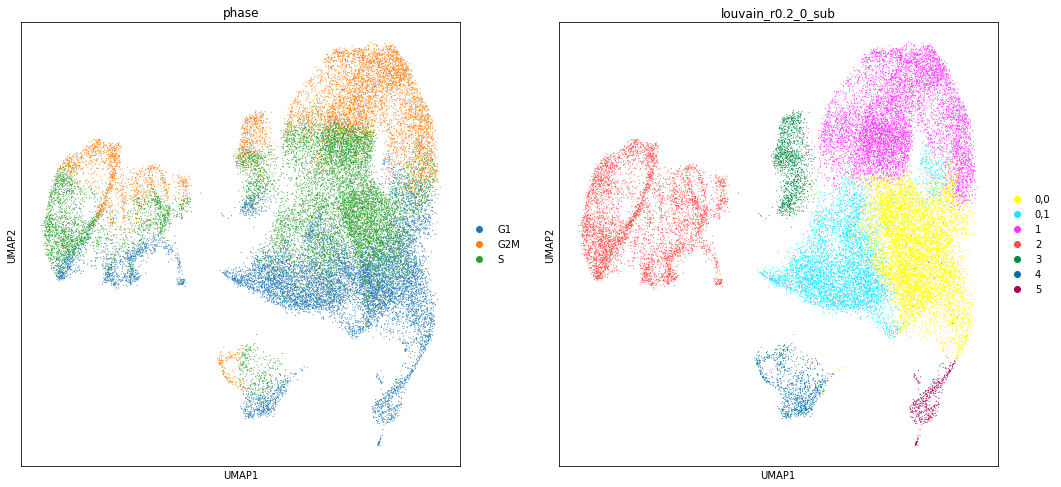

In [27]:
sc.pl.umap(adata, color=['phase', 'louvain_r0.2_0_sub'])

## Revised cluster assignment:

- 0: Neural stem cells (NSC)
- 1: Neural stem cells (NSC) - proliferating
- 2: Neural crest cells (NCSC)
- 3: Unknown (glial)
- 4: Glial precursors (myelinating)
- 5: Neural precursor cell / immature neuron

### Cluster 4

In [28]:
sc.tl.louvain(adata, restrict_to=('louvain_r0.2_0_sub', ['4']), resolution=0.2, key_added='louvain_r0.2_0_4_sub')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)


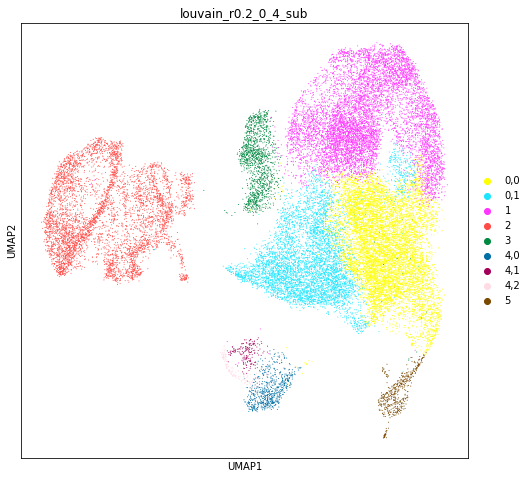

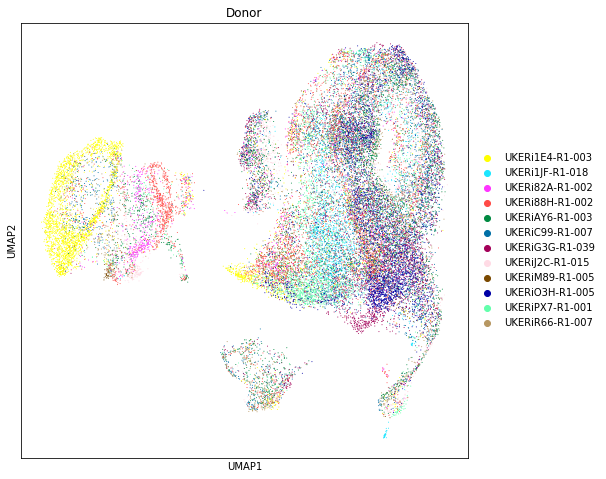

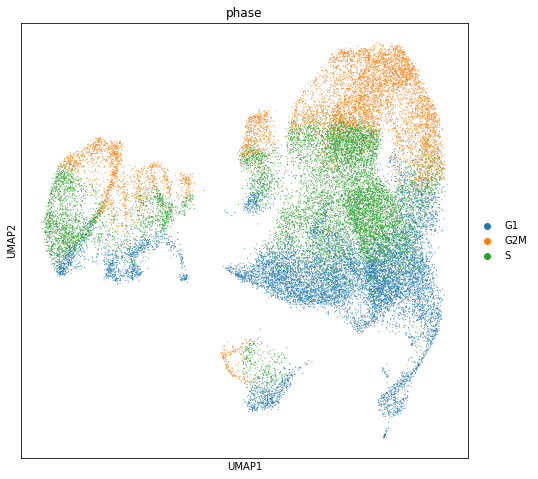

In [29]:
#Show the new clustering
sc.pl.umap(adata, color='louvain_r0.2_0_4_sub', palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color='Donor', palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color='phase')

In [30]:
#Get the new marker genes
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.2_0_4_sub', key_added='rank_genes_r0.2_0_4_sub')

ranking genes
    finished (0:00:24)


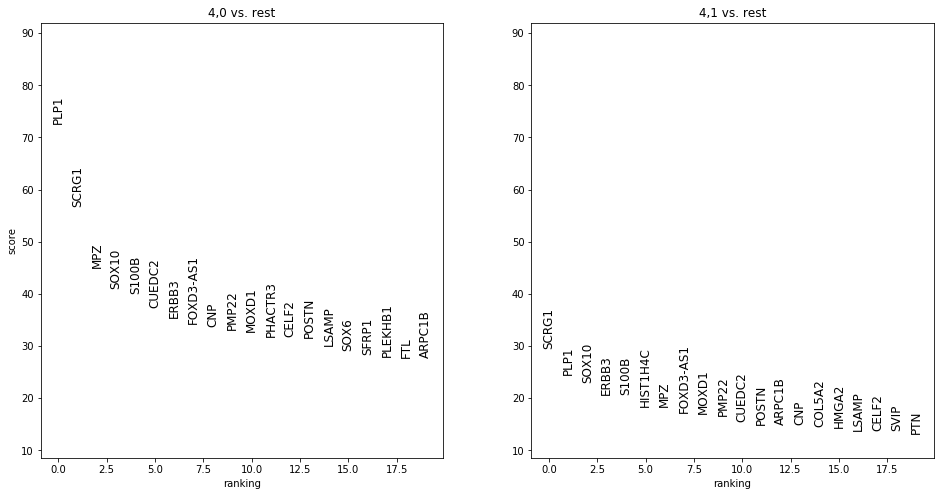

In [31]:
#Plot the new marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes_r0.2_0_4_sub', groups=['4,0','4,1','4,2'], fontsize=12)

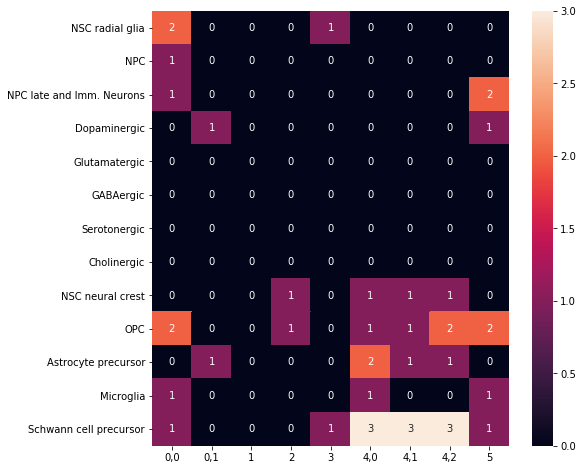

In [32]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_4_sub', normalize='None'), annot = True)

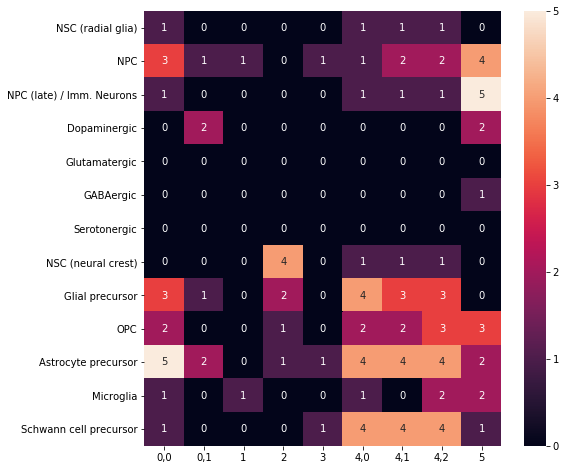

In [33]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_4_sub', normalize='None'), annot = True)

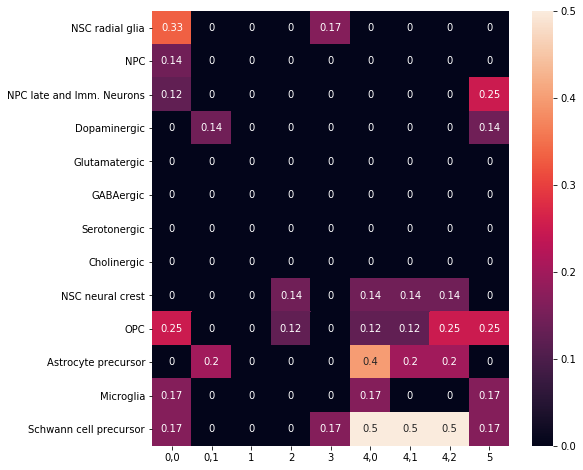

In [34]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_4_sub', normalize='reference'), annot = True)

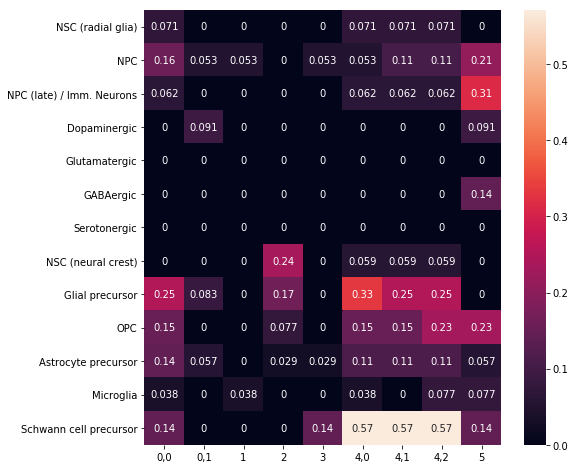

In [35]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_4_sub', normalize='reference'), annot = True)

computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:08)


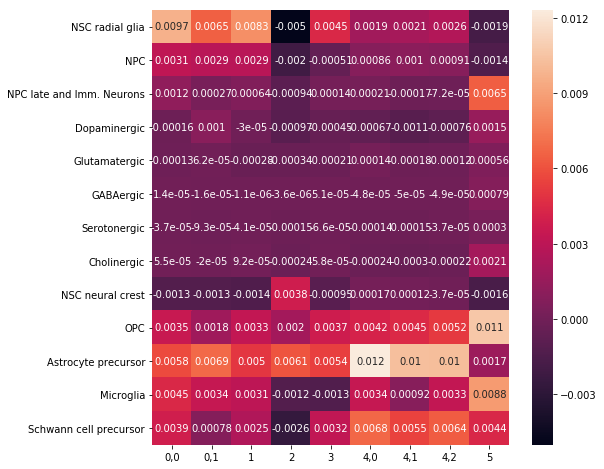

In [36]:
groups = adata.obs['louvain_r0.2_0_4_sub'].cat.categories
df = np.zeros((len(marker_genes_2), len(groups)))
i=-1
for marker in marker_genes_2:
    i+=1
    sc.tl.score_genes(adata, marker_genes_2[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_4_sub'] == group])
        j += 1
cells = marker_genes_2.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

computing score 'score'
    finished (0:00:09)
computing score 'score'
    finished (0:00:11)
computing score 'score'
    finished (0:00:18)
computing score 'score'
    finished (0:00:23)
computing score 'score'
    finished (0:00:26)
computing score 'score'
    finished (0:00:21)
computing score 'score'
    finished (0:00:34)
computing score 'score'
    finished (0:00:47)
computing score 'score'
    finished (0:00:50)
computing score 'score'
    finished (0:00:17)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)


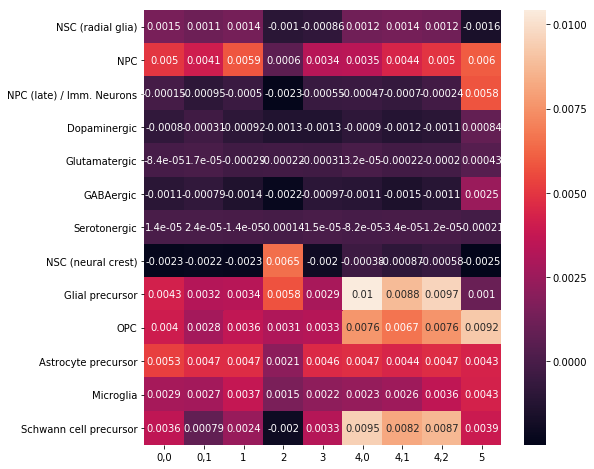

In [37]:
groups = adata.obs['louvain_r0.2_0_4_sub'].cat.categories
df = np.zeros((len(marker_genes), len(groups)))
i=-1
for marker in marker_genes:
    i+=1
    sc.tl.score_genes(adata, marker_genes[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_4_sub'] == group])
        j += 1
cells = marker_genes.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

In [38]:
#GO:BP enrichment of marker gene sets for further support of cluster annotation
pd.set_option("display.max_colwidth", 800)

for i in ['4,0', '4,1']:
    print(f"Cluster {i}:")
    clust_enrichment = gprofiler(adata.uns['rank_genes_r0.2_0_4_sub']['names'][i], custom_bg=adata.var_names.tolist(), organism='hsapiens', correction_method='fdr', src_filter=['GO:BP'])
    clust_enrichment = clust_enrichment.sort_values('p.value').iloc[:,[2,3,5,6,11]]
    clust_enrichment.iloc[:50,:]
    print("")

Cluster 4,0:


p.value  term.size  overlap.size  recall  \
term.id                                                 
GO:0042063  0.000008        237            13   0.134   
GO:0022008  0.000010       1395            29   0.299   
GO:0010001  0.000016        178            11   0.113   
GO:0048468  0.000042       1757            31   0.320   
GO:0001568  0.000042        559            17   0.175   
GO:0007399  0.000042       2077            34   0.351   
GO:0048731  0.000042       3840            49   0.505   
GO:0048666  0.000048        960            22   0.227   
GO:0001944  0.000055        585            17   0.175   
GO:0072359  0.000059        897            21   0.216   
GO:0072358  0.000060        594            17   0.175   
GO:0048856  0.000082       4659            54   0.557   
GO:0008283  0.000082       1662            29   0.299   
GO:0035239  0.000082        693            18   0.186   
GO:0031175  0.000082        851            20   0.206   
GO:0030182  0.000082       1183            24   0.247   
GO:0007275  0.000092       4285            51   0.526   
GO:0048514  0.000092        486            15   0.155   
GO:0048869  0.000092       3381            44   0.454   
GO:0048699  0.000093       1309            25   0.258   
GO:0032502  0.000097       4989            56   0.577   
GO:0033993  0.000164        744            18   0.186   
GO:0009605  0.000182       1667            28   0.289   
GO:0050793  0.000205       2101            32   0.330   
GO:0035295  0.000225        852            19   0.196   
GO:0014009  0.000225         32             5   0.052   
GO:1901700  0.000250       1309            24   0.247   
GO:0042127  0.000263       1315            24   0.247   
GO:0009725  0.000309        797            18   0.186   
GO:0009653  0.000309       2163            32   0.330   
GO:0051239  0.000309       2385            34   0.351   
GO:0030154  0.000310       3219            41   0.423   
GO:0009719  0.000336       1346            24   0.247   
GO:0032501  0.000343       5529            58   0.598   
GO:0007422  0.000353         65             6   0.062   
GO:0048646  0.000405        905            19   0.196   
GO:0042552  0.000430        104             7   0.072   
GO:0008366  0.000466        106             7   0.072   
GO:0034381  0.000466         40             5   0.052   
GO:0007272  0.000466        106             7   0.072   
GO:0050680  0.000572        110             7   0.072   
GO:0032799  0.000583         20             4   0.041   
GO:0010033  0.000695       2624            35   0.361   
GO:0000902  0.000702        865            18   0.186   
GO:0048863  0.000702        161             8   0.082   
GO:0031099  0.000751        163             8   0.082   
GO:0050678  0.000751        273            10   0.103   
GO:0000184  0.000797        120             7   0.072   
GO:0033273  0.000797         80             6   0.062   
GO:0016202  0.000797        119             7   0.072   

                                                                            term.name  
term.id                                                                                
GO:0042063                                                                gliogenesis  
GO:0022008                                                               neurogenesis  
GO:0010001                                                 glial cell differentiation  
GO:0048468                                                           cell development  
GO:0001568                                                   blood vessel development  
GO:0007399                                                 nervous system development  
GO:0048731                                                         system development  
GO:0048666                                                         neuron development  
GO:0001944                                                    vasculature development  
GO:0072359                                             circulatory system develo


Cluster 4,1:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0048869  8.310000e-07       3381            50   0.515   
GO:0030154  8.310000e-07       3219            49   0.505   
GO:0032502  8.320000e-07       4989            62   0.639   
GO:0048731  1.050000e-06       3840            53   0.546   
GO:0048856  1.110000e-06       4659            59   0.608   
GO:0007275  1.220000e-06       4285            56   0.577   
GO:0022008  4.710000e-06       1395            29   0.299   
GO:0032501  9.120000e-06       5529            63   0.649   
GO:0048699  1.370000e-05       1309            27   0.278   
GO:0007399  1.370000e-05       2077            35   0.361   
GO:0050793  1.460000e-05       2101            35   0.361   
GO:0031175  2.620000e-05        851            21   0.216   
GO:0048468  2.660000e-05       1757            31   0.320   
GO:0051674  2.900000e-05       1208            25   0.258   
GO:0048870  2.900000e-05       1208            25   0.258   
GO:0048666  3.200000e-05        960            22   0.227   
GO:0006323  3.200000e-05        171            10   0.103   
GO:0016043  4.640000e-05       5434            60   0.619   
GO:0071103  5.400000e-05        233            11   0.113   
GO:0051239  5.400000e-05       2385            36   0.371   
GO:0016477  6.210000e-05       1099            23   0.237   
GO:0040011  8.690000e-05       1399            26   0.268   
GO:0061564  1.110000e-04        433            14   0.144   
GO:0071840  1.250000e-04       5606            60   0.619   
GO:0030182  1.810000e-04       1183            23   0.237   
GO:0045595  2.170000e-04       1484            26   0.268   
GO:0000902  2.610000e-04        865            19   0.196   
GO:0032989  2.610000e-04        950            20   0.206   
GO:0010001  2.610000e-04        178             9   0.093   
GO:0042063  3.180000e-04        237            10   0.103   
GO:0001501  3.750000e-04        428            13   0.134   
GO:0007422  3.790000e-04         65             6   0.062   
GO:0033993  4.930000e-04        744            17   0.175   
GO:0050673  5.300000e-04        315            11   0.113   
GO:0051172  5.300000e-04       2009            30   0.309   
GO:0032990  5.300000e-04        595            15   0.155   
GO:0006266  5.300000e-04         19             4   0.041   
GO:0051241  5.300000e-04        924            19   0.196   
GO:0048066  5.320000e-04         41             5   0.052   
GO:0065007  5.420000e-04       9611            82   0.845   
GO:0031324  6.250000e-04       2149            31   0.320   
GO:0006928  6.700000e-04       1622            26   0.268   
GO:0051094  6.700000e-04       1130            21   0.216   
GO:0000904  6.870000e-04        615            15   0.155   
GO:0009890  7.030000e-04       1328            23   0.237   
GO:0007409  7.090000e-04        398            12   0.124   
GO:2000026  7.130000e-04       1636            26   0.268   
GO:0050789  7.130000e-04       9121            79   0.814   
GO:0048523  7.270000e-04       3886            45   0.464   
GO:0050678  7.270000e-04        273            10   0.103   

                                                                 term.name  
term.id                                                                     
GO:0048869                                  cellular developmental process  
GO:0030154                                            cell differentiation  
GO:0032502                                           developmental process  
GO:0048731                                              system development  
GO:0048856                                anatomical structure development  
GO:0007275                              multicellular organism development  
GO:0022008                                                    neurogenesis  
GO:0032501                                multicellular organismal process  
GO:0048699                                           generation of neurons

Notes:
- again cell cycle seems to separate these clusters

### Cluster 3

In [39]:
sc.tl.louvain(adata, restrict_to=('louvain_r0.2_0_sub', ['3']), resolution=0.2, key_added='louvain_r0.2_0_3_sub')

running Louvain clustering
    using the "louvain" package of Traag (2017)
    finished (0:00:00)


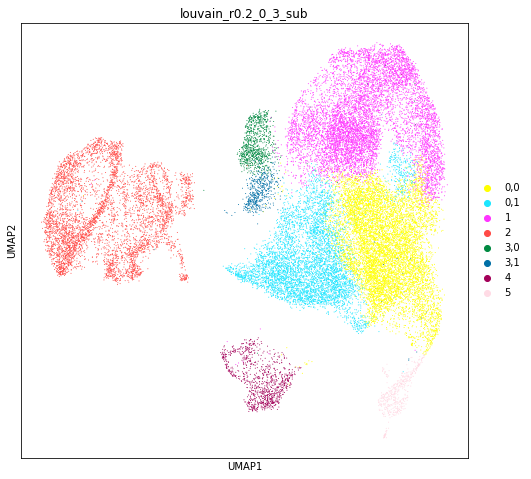

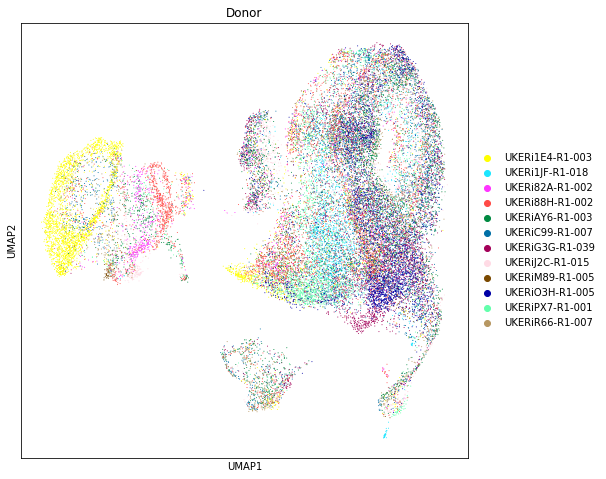

In [40]:
#Show the new clustering
sc.pl.umap(adata, color='louvain_r0.2_0_3_sub', palette=sc.pl.palettes.godsnot_64)
sc.pl.umap(adata, color='Donor', palette=sc.pl.palettes.godsnot_64)

In [41]:
#Get the new marker genes
sc.tl.rank_genes_groups(adata, groupby='louvain_r0.2_0_3_sub', key_added='rank_genes_r0.2_0_3_sub')

ranking genes
    finished (0:00:21)


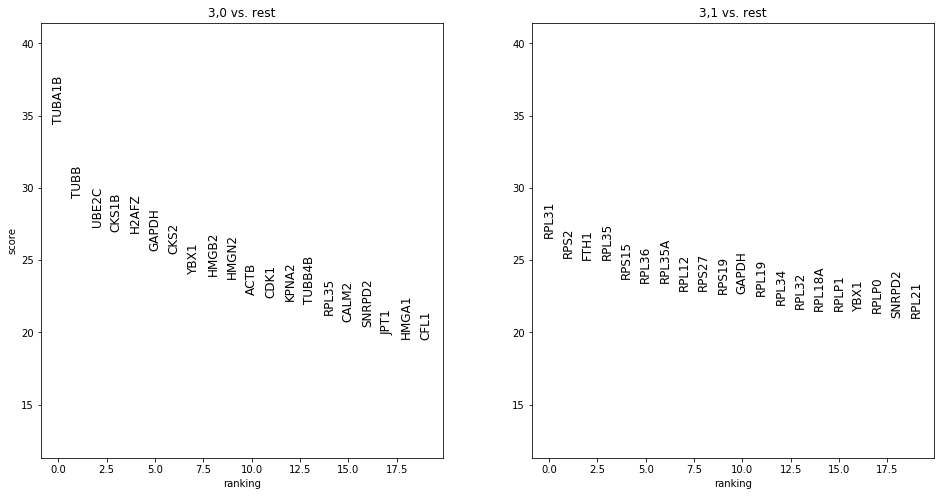

In [42]:
#Plot the new marker genes
sc.pl.rank_genes_groups(adata, key='rank_genes_r0.2_0_3_sub', groups=['3,0','3,1'], fontsize=12)

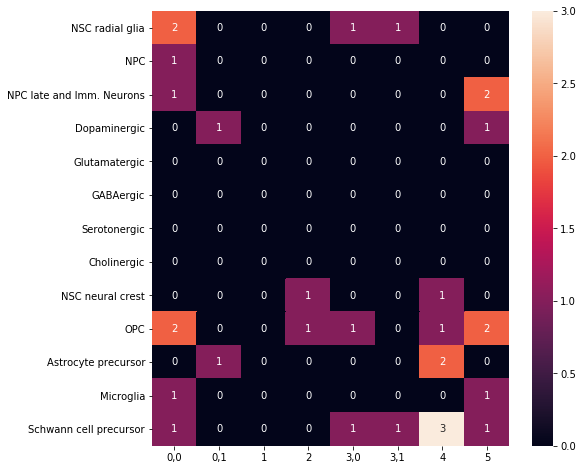

In [43]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_3_sub', normalize='None'), annot = True)

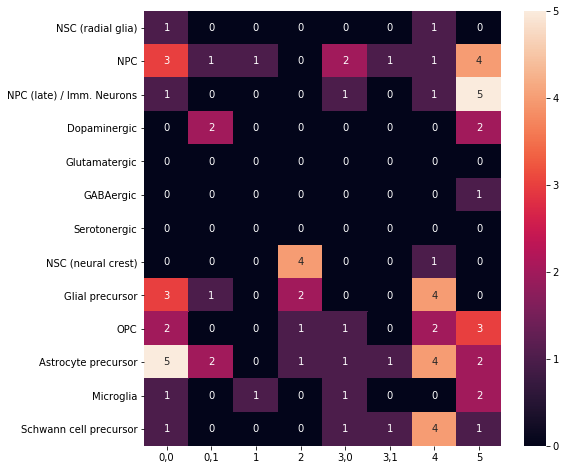

In [44]:
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_3_sub', normalize='None'), annot = True)

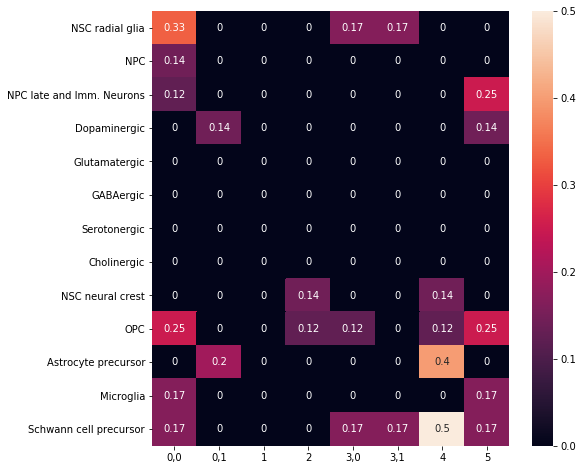

In [45]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes_2, key='rank_genes_r0.2_0_3_sub', normalize='reference'), annot = True)

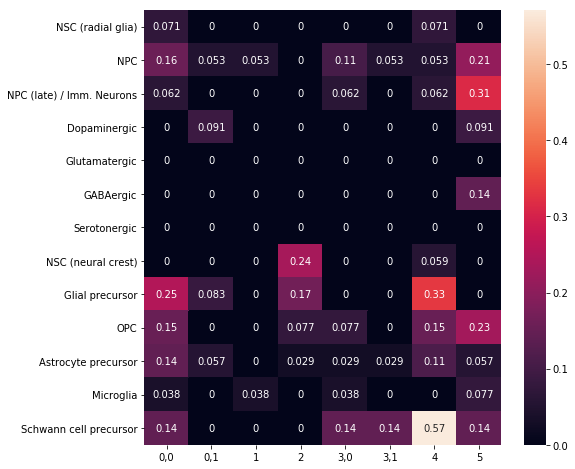

In [46]:
#Find marker overlap
sb.heatmap(sc.tl.marker_gene_overlap(adata, marker_genes, key='rank_genes_r0.2_0_3_sub', normalize='reference'), annot = True)

computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)


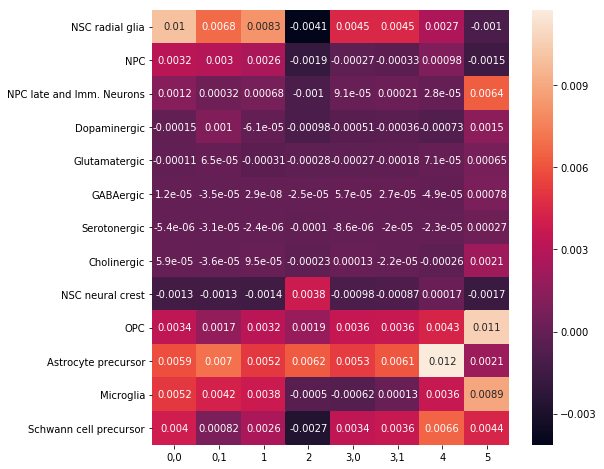

In [47]:
groups = adata.obs['louvain_r0.2_0_3_sub'].cat.categories
df = np.zeros((len(marker_genes_2), len(groups)))
i=-1
for marker in marker_genes_2:
    i+=1
    sc.tl.score_genes(adata, marker_genes_2[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_3_sub'] == group])
        j += 1
cells = marker_genes_2.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:07)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:08)
computing score 'score'
    finished (0:00:07)


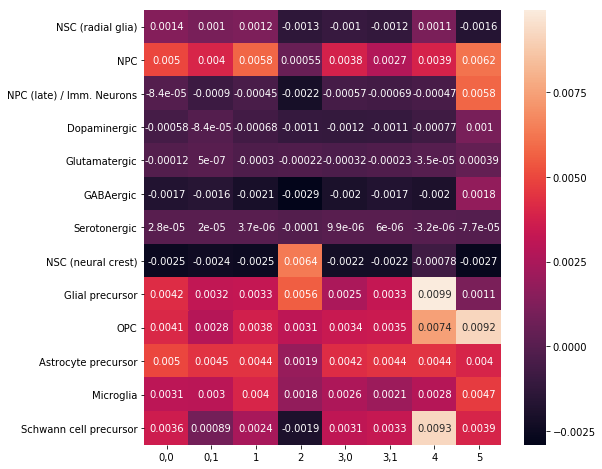

In [48]:
groups = adata.obs['louvain_r0.2_0_3_sub'].cat.categories
df = np.zeros((len(marker_genes), len(groups)))
i=-1
for marker in marker_genes:
    i+=1
    sc.tl.score_genes(adata, marker_genes[marker])
    j = 0
    for group in groups:
        df[i, j] = np.mean(adata.obs['score'][adata.obs['louvain_r0.2_0_3_sub'] == group])
        j += 1
cells = marker_genes.keys()
DF = pd.DataFrame(df, index = cells, columns = groups)
sb.heatmap(DF, annot = True)

In [49]:
#GO:BP enrichment of marker gene sets for further support of cluster annotation
pd.set_option("display.max_colwidth", 800)

for i in ['3,0', '3,1']:
    print(f"Cluster {i}:")
    clust_enrichment = gprofiler(adata.uns['rank_genes_r0.2_0_3_sub']['names'][i], custom_bg=adata.var_names.tolist(), organism='hsapiens', correction_method='fdr', src_filter=['GO:BP'])
    clust_enrichment = clust_enrichment.sort_values('p.value').iloc[:,[2,3,5,6,11]]
    clust_enrichment.iloc[:50,:]
    print("")

Cluster 3,0:


p.value  term.size  overlap.size  recall  \
term.id                                                     
GO:0051301  1.000000e-19        547            33   0.333   
GO:0031145  3.050000e-17         35            13   0.131   
GO:0000278  7.980000e-17        882            36   0.364   
GO:1903047  1.210000e-16        724            33   0.333   
GO:0007049  1.780000e-13       1608            42   0.424   
GO:0006996  9.770000e-13       3398            59   0.596   
GO:0022402  3.790000e-12       1126            34   0.343   
GO:0044265  6.970000e-11       1024            31   0.313   
GO:0034655  2.040000e-10        495            22   0.222   
GO:0046700  5.660000e-10        526            22   0.222   
GO:0051726  5.660000e-10       1046            30   0.303   
GO:0044772  5.660000e-10        470            21   0.212   
GO:0044270  5.730000e-10        529            22   0.222   
GO:0019439  7.830000e-10        540            22   0.222   
GO:0007059  9.290000e-10        290            17   0.172   
GO:0140014  9.290000e-10        248            16   0.162   
GO:1901361  1.280000e-09        560            22   0.222   
GO:0044770  1.280000e-09        503            21   0.212   
GO:0000070  1.370000e-09        145            13   0.131   
GO:0007346  1.710000e-09        571            22   0.222   
GO:0006614  2.220000e-09         92            11   0.111   
GO:0051276  2.350000e-09       1063            29   0.293   
GO:0009057  2.350000e-09       1219            31   0.313   
GO:0044248  2.420000e-09       1923            39   0.394   
GO:1902850  2.420000e-09        122            12   0.121   
GO:0034622  2.920000e-09       1001            28   0.283   
GO:0006613  3.620000e-09         98            11   0.111   
GO:1901575  4.210000e-09       1781            37   0.374   
GO:0051641  4.210000e-09       2469            44   0.444   
GO:0045047  4.440000e-09        101            11   0.111   
GO:0071840  4.680000e-09       5606            69   0.697   
GO:0006402  4.680000e-09        289            16   0.162   
GO:0007017  4.740000e-09        681            23   0.232   
GO:0000819  5.550000e-09        169            13   0.131   
GO:0072599  5.890000e-09        105            11   0.111   
GO:0000280  1.230000e-08        361            17   0.172   
GO:0006401  1.750000e-08        320            16   0.162   
GO:0007051  2.070000e-08        153            12   0.121   
GO:0044085  2.090000e-08       2835            46   0.465   
GO:0000184  2.120000e-08        120            11   0.111   
GO:0070972  2.930000e-08        124            11   0.111   
GO:0010564  3.160000e-08        626            21   0.212   
GO:0009056  3.270000e-08       2139            39   0.394   
GO:0000956  3.320000e-08        200            13   0.131   
GO:0016043  3.490000e-08       5434            66   0.667   
GO:0051649  4.130000e-08       1864            36   0.364   
GO:0048285  5.340000e-08        404            17   0.172   
GO:0007052  5.610000e-08        101            10   0.101   
GO:0007010  8.350000e-08       1113            27   0.273   
GO:0016071  8.620000e-08        737            22   0.222   

                                                                             term.name  
term.id                                                                                 
GO:0051301                                                               cell division  
GO:0031145                      anaphase-promoting complex-dependent catabolic process  
GO:0000278                                                          mitotic cell cycle  
GO:1903047                                                  mitotic cell cycle process  
GO:0007049                                                                  cell cycle  
GO:0006996                                                      organelle organization  
GO:0022402                                                          cell cycle process  
GO:0044265                                 


Cluster 3,1:


p.value  term.size  overlap.size  recall  \
term.id                                                      
GO:0006614  1.190000e-150         92            72   0.735   
GO:0006613  2.700000e-147         98            72   0.735   
GO:0045047  8.150000e-146        101            72   0.735   
GO:0072599  7.100000e-144        105            72   0.735   
GO:0000184  1.990000e-137        120            72   0.735   
GO:0070972  5.880000e-136        124            72   0.735   
GO:0006612  1.190000e-124        161            72   0.735   
GO:0006413  1.430000e-118        188            72   0.735   
GO:0000956  3.300000e-116        200            72   0.735   
GO:0090150  3.430000e-107        272            73   0.745   
GO:0006402  5.210000e-105        289            73   0.745   
GO:0006401  2.270000e-101        320            73   0.745   
GO:0006605   2.660000e-93        379            72   0.735   
GO:0034655   2.790000e-88        495            74   0.755   
GO:0072657   6.090000e-87        515            74   0.755   
GO:0046700   3.070000e-86        526            74   0.755   
GO:0044270   4.590000e-86        529            74   0.755   
GO:0019439   2.130000e-85        540            74   0.755   
GO:1901361   3.550000e-84        560            74   0.755   
GO:0006412   4.520000e-84        595            75   0.765   
GO:0072594   6.570000e-84        503            72   0.735   
GO:0043043   5.030000e-83        614            75   0.765   
GO:0006518   4.450000e-79        729            76   0.776   
GO:0043604   3.100000e-77        729            75   0.765   
GO:0016071   7.040000e-77        737            75   0.765   
GO:0033365   1.400000e-70        800            73   0.745   
GO:0043603   3.180000e-70        947            76   0.776   
GO:0044265   2.950000e-64       1024            74   0.755   
GO:0006886   4.220000e-64        929            72   0.735   
GO:0009057   1.220000e-58       1219            74   0.755   
GO:1901566   1.760000e-58       1623            80   0.816   
GO:0046907   4.060000e-55       1564            77   0.786   
GO:0010629   6.350000e-54       1550            76   0.776   
GO:0034613   3.040000e-53       1583            76   0.776   
GO:0070727   4.550000e-53       1592            76   0.776   
GO:0015031   7.960000e-53       1678            77   0.786   
GO:0015833   2.350000e-52       1703            77   0.786   
GO:0042886   4.690000e-52       1719            77   0.786   
GO:0045184   6.370000e-51       1780            77   0.786   
GO:0071705   7.430000e-51       1946            79   0.806   
GO:1901575   1.730000e-49       1781            76   0.776   
GO:0051649   1.980000e-49       1864            77   0.786   
GO:0051641   1.870000e-48       2469            83   0.847   
GO:0002181   3.500000e-47         90            32   0.327   
GO:0044248   4.900000e-47       1923            76   0.776   
GO:0071702   7.280000e-46       2261            79   0.806   
GO:0008104   1.310000e-44       2348            79   0.806   
GO:0010605   2.190000e-44       2270            78   0.796   
GO:0009056   1.190000e-43       2139            76   0.776   
GO:0033036   1.820000e-42       2607            80   0.816   

                                                                                term.name  
term.id                                                                                    
GO:0006614                    SRP-dependent cotranslational protein targeting to membrane  
GO:0006613                                  cotranslational protein targeting to membrane  
GO:0045047                                                        protein targeting to ER  
GO:0072599                 establishment of protein localization to endoplasmic reticulum  
GO:0000184            nuclear-transcribed mRNA catabolic process, nonsense-mediated decay  
GO:0070972                                  protein localization to endoplasmic reticulum  
GO:0006612                                               

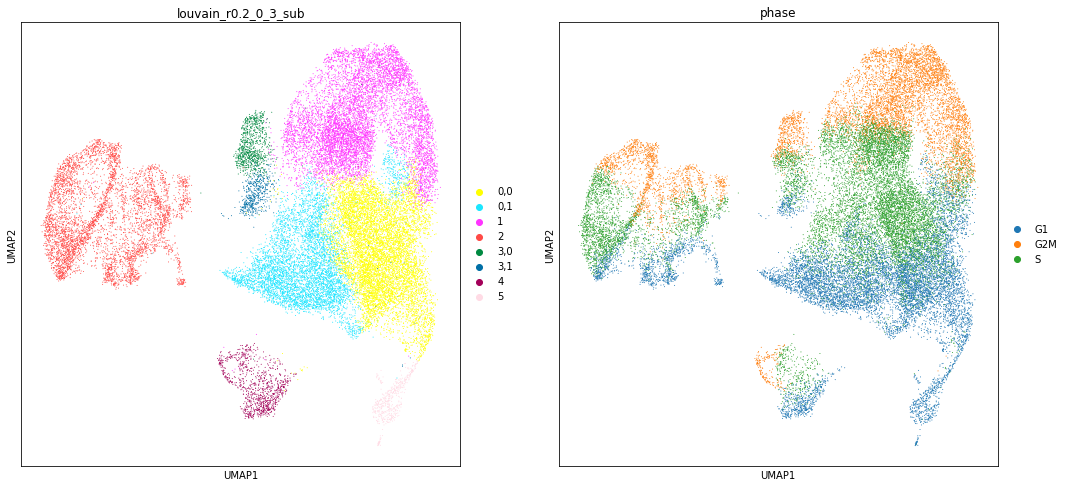

In [50]:
sc.pl.umap(adata, color=['louvain_r0.2_0_3_sub', 'phase'])

Notes:
- subcluster 3 is a cell cycle effect. 3,0 is more prolifterative (G2M-phase) and 3,1 is S and G1 phase.

# Rename categories

In [51]:
adata.obs['louvain_r0.2'].cat.categories
adata.obs['louvain_r0.2_0_sub'].cat.categories
adata.obs['louvain_r0.2_0_4_sub'].cat.categories

Index(['0', '1', '2', '3', '4', '5'], dtype='object')

Index(['0,0', '0,1', '1', '2', '3', '4', '5'], dtype='object')

Index(['0,0', '0,1', '1', '2', '3', '4,0', '4,1', '4,2', '5'], dtype='object')

In [52]:
adata.rename_categories('louvain_r0.2', ['NSC', 'NSC (G2M-phase)', 'NCSC', 'apop. NPC', 'Glial precursors', 
                                         'Immature neurons'])

In [53]:
adata.obs['louvain_r0.2_0_sub'] = ['1' if clust == '0,2' else clust for clust in adata.obs['louvain_r0.2_0_sub']]
adata.obs['louvain_r0.2_0_sub'] = adata.obs['louvain_r0.2_0_sub'].astype('category')

In [54]:
adata.obs['louvain_r0.2_0_sub'].cat.categories

Index(['0,0', '0,1', '1', '2', '3', '4', '5'], dtype='object')

In [55]:
adata.rename_categories('louvain_r0.2_0_sub', ['NSC1a', 'NSC2a','NSC (G2M-phase)', 'NCSC', 
                                               'apop. NPC', 'Glial precursors', 'Immature neurons'])

In [56]:
adata.obs['louvain_r0.2_0_4_sub'] = ['1' if clust == '0,2' else clust for clust in adata.obs['louvain_r0.2_0_4_sub']]
adata.obs['louvain_r0.2_0_4_sub'] = adata.obs['louvain_r0.2_0_4_sub'].astype('category')

In [57]:
adata.obs['louvain_r0.2_0_4_sub'].cat.categories

Index(['0,0', '0,1', '1', '2', '3', '4,0', '4,1', '4,2', '5'], dtype='object')

In [60]:
adata.rename_categories('louvain_r0.2_0_4_sub', ['NSC1a', 'NSC2a', 'NSC (G2M-phase)', 'NCSC', 
                                                 'apop. NPC', 'Glial precursors,0', 'Glial precursors,1', 'Glial precursors,2', 
                                                 'Immature neurons'])

# Trajectories within NPCs

In [61]:
#Subset to NPCs
adata_npc = adata[[g in ['NSC', 'NSC (G2M-phase)', 'Immature neurons', 'apop. NPC'] for g in adata.obs['louvain_r0.2']],:].copy()
adata_npc.obs['louvain_r0.2'].value_counts()

NSC                 14341
NSC (G2M-phase)      8167
apop. NPC            1369
Immature neurons      498
Name: louvain_r0.2, dtype: int64

In [62]:
sc.pp.pca(adata_npc, n_comps=50, svd_solver='arpack')
sc.pp.neighbors(adata_npc)
sc.tl.diffmap(adata_npc)

computing PCA with n_comps = 50
computing PCA on highly variable genes
    finished (0:00:05)
computing neighbors
    using 'X_pca' with n_pcs = 50


/home/icb/malte.luecken/anaconda3/envs/sc-tutorial/lib/python3.6/site-packages/umap/rp_tree.py:450: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "make_euclidean_tree" failed type inference due to: Cannot unify RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none) and RandomProjectionTreeNode(none, bool, array(float32, 1d, C), float64, RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none), RandomProjectionTreeNode(array(int64, 1d, C), bool, none, none, none, none)) for '$16.16', defined at /home/icb/malte.luecken/anaconda3/envs/sc-tutorial/lib/python3.6/site-packages/umap/rp_tree.py (457)

File "../../../../../../../../../../../home/icb/malte.luecken/anaconda3/envs/sc-tutorial/lib/python3.6/site-packages/umap/rp_tree.py", line 457:
def make_euclidean_tree(data, indices, rng_state, leaf_size=30):
    <source elided>

        left_node = make_euclidean_tree(data, left_indices, rng_state, lea

    finished (0:00:12)
computing Diffusion Maps using n_comps=15(=n_dcs)
computing transitions
    finished (0:00:00)
    eigenvalues of transition matrix
    [1.         0.99398434 0.9893031  0.9787958  0.97337246 0.9681055
     0.9627244  0.95993584 0.95663375 0.9540184  0.94565195 0.94464713
     0.93762094 0.9367025  0.93521553]
    finished (0:00:00)


In [63]:
adata.var_names[[g.startswith('PTCH') for g in adata.var_names]]

Index(['PTCH2', 'PTCHD4', 'PTCHD1', 'PTCH1'], dtype='object')

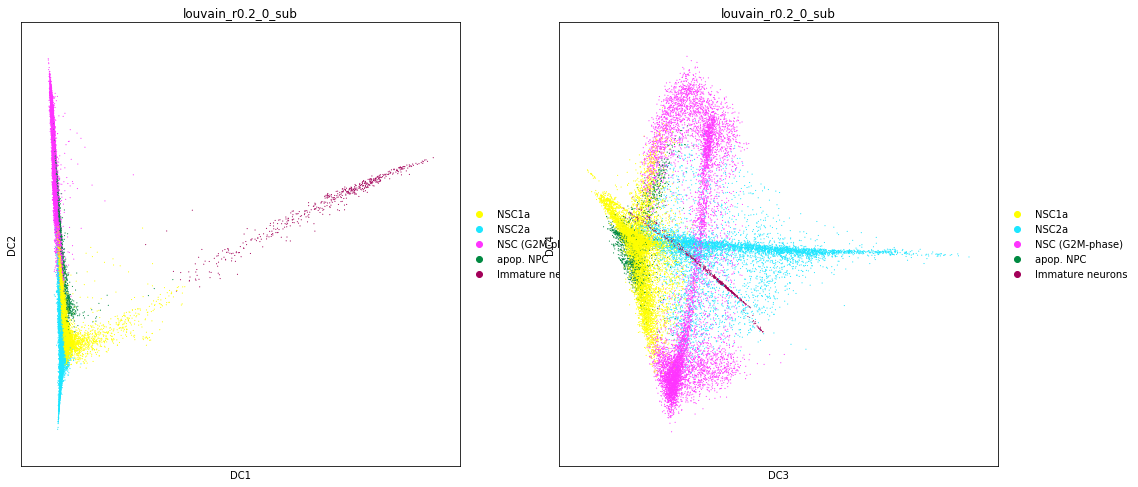

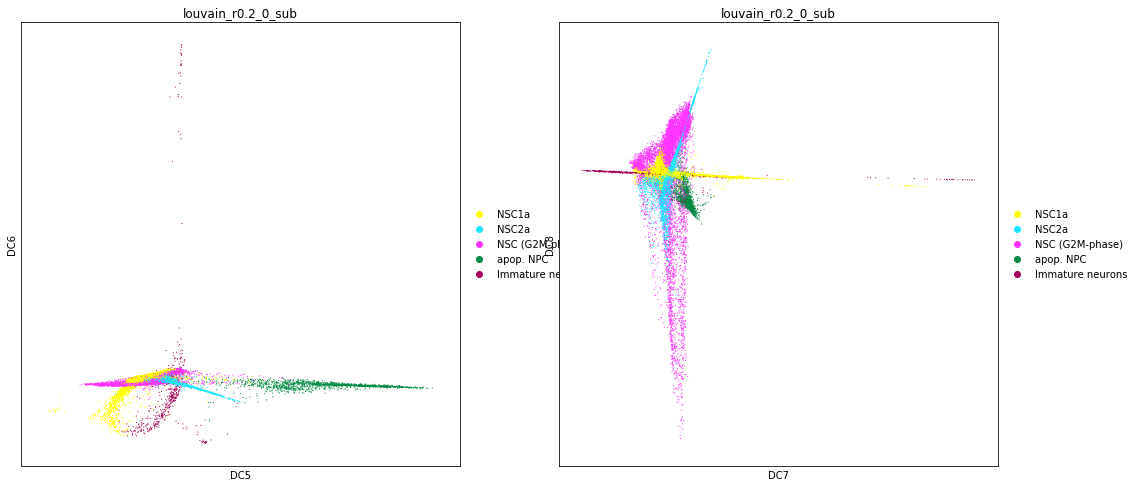

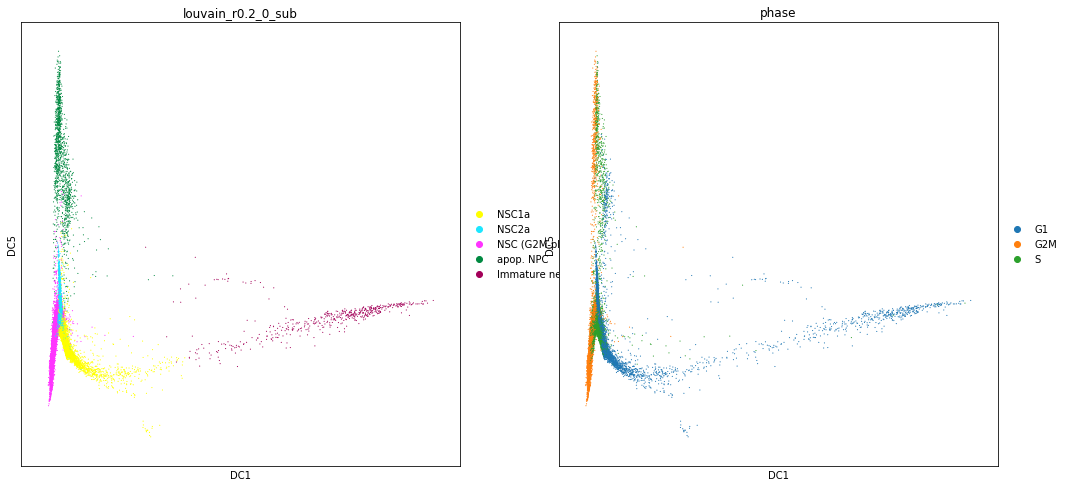

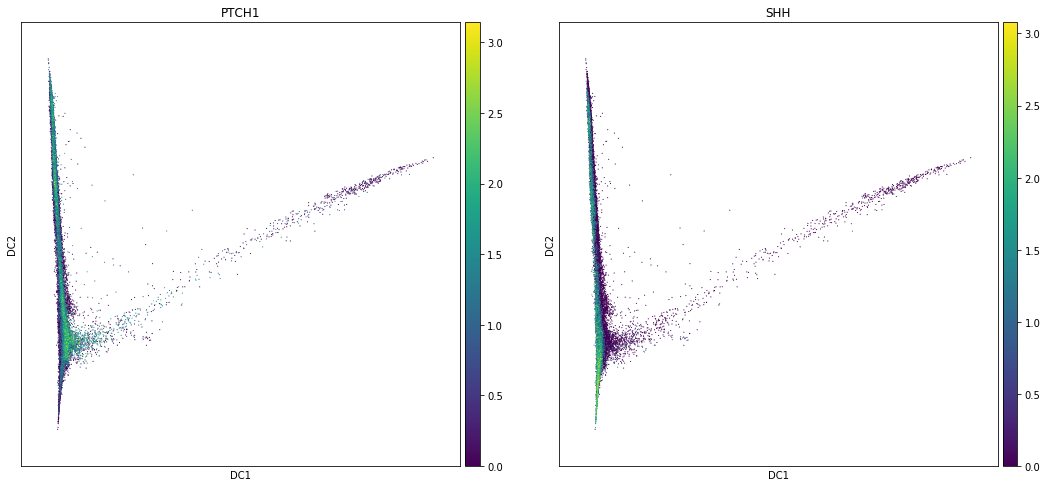

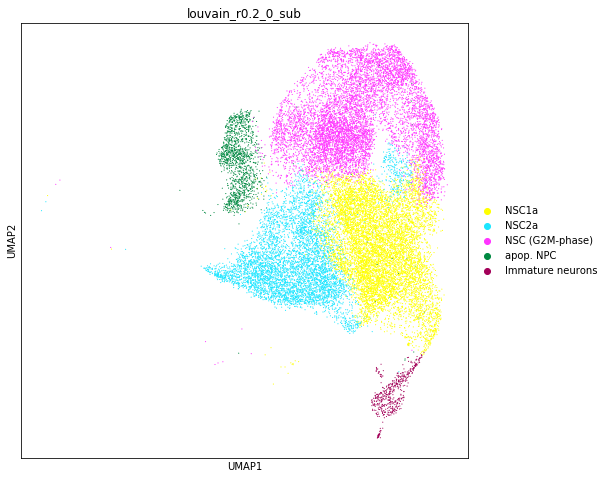

In [64]:
sc.pl.diffmap(adata_npc, components=['1,2', '3,4'], color='louvain_r0.2_0_sub')
sc.pl.diffmap(adata_npc, components=['5,6','7,8'], color='louvain_r0.2_0_sub')
sc.pl.diffmap(adata_npc, components=['1,5'], color=['louvain_r0.2_0_sub', 'phase'])
sc.pl.diffmap(adata_npc, components=['1,2'], color=['PTCH1', 'SHH'])
sc.pl.umap(adata_npc, color='louvain_r0.2_0_sub')

In [66]:
#Use 'NSC (G2M-phase)' cell with maximum DC2
npc_early_mask = np.isin(adata_npc.obs['louvain_r0.2_0_sub'], 'NSC (G2M-phase)')
max_npc_id = np.argmax(adata_npc.obsm['X_diffmap'][npc_early_mask,2])
root_id = np.arange(len(npc_early_mask))[npc_early_mask][max_npc_id]

adata_npc.uns['iroot'] = root_id
print('The root id is {}'.format(root_id))

#Compute dpt
sc.tl.dpt(adata_npc)

The root id is 10786
computing Diffusion Pseudotime using n_dcs=10
    finished (0:00:00)


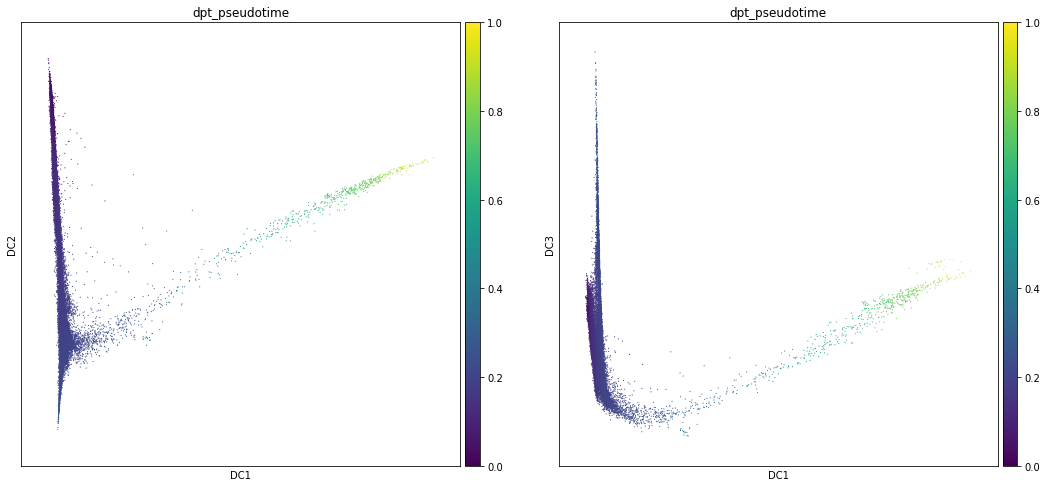

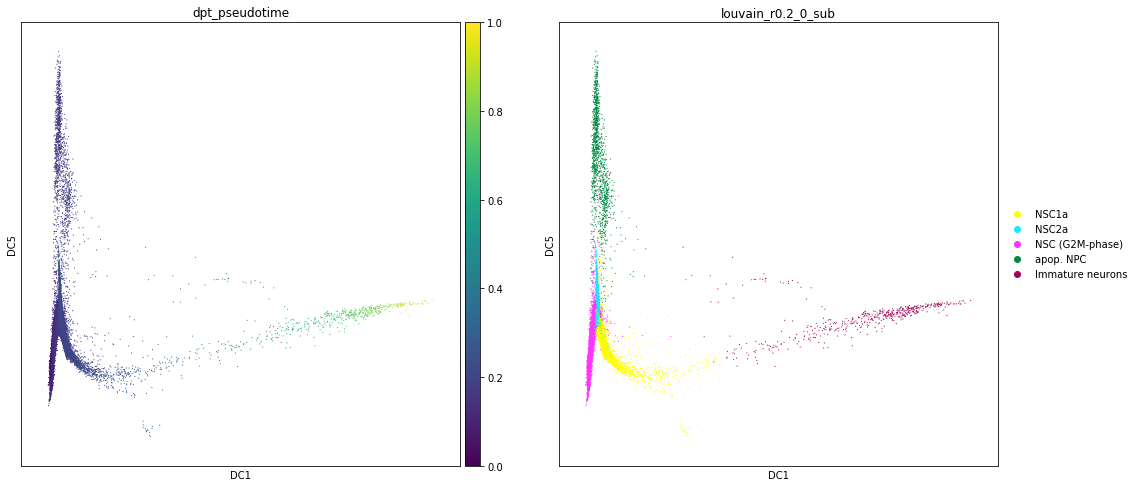

In [67]:
#Visualize pseudotime over differentiation
sc.pl.diffmap(adata_npc, components=['1,2','1,3'], color='dpt_pseudotime')
sc.pl.diffmap(adata_npc, components=['1,5'], color=['dpt_pseudotime', 'louvain_r0.2_0_sub'])

In [68]:
#Move pseudotime back to main adata object
new_obs = adata.obs.merge(adata_npc.obs['dpt_pseudotime'], how='left', left_index=True, right_index=True)

In [69]:
new_obs

Demux_state            Donor Lane  Number of genes  \
AAACCTGTCTTGTACT         SNG  UKERiJ2C-R1-015    1             4590   
AAACGGGTCGTTACAG         SNG  UKERiJ2C-R1-015    1             4068   
AAAGATGCAAGCCCAC         SNG  UKERiJ2C-R1-015    1             1195   
AAAGATGCAATCGGTT         SNG  UKERiJ2C-R1-015    1             4675   
AAAGCAAAGAGTCGGT         SNG  UKERiJ2C-R1-015    1             3521   
AAAGTAGGTTAAAGTG         SNG  UKERiJ2C-R1-015    1             3930   
AAATGCCAGGATTCGG         SNG  UKERiJ2C-R1-015    1             3542   
AAATGCCTCGTGGTCG         SNG  UKERiJ2C-R1-015    1             4703   
AAATGCCTCTGTGCAA         SNG  UKERiJ2C-R1-015    1             1573   
AACCGCGAGGTTACCT         SNG  UKERiJ2C-R1-015    1             2572   
AACCGCGAGTCATCCA         SNG  UKERiJ2C-R1-015    1             5706   
AACGTTGCACCCATTC         SNG  UKERiJ2C-R1-015    1             4765   
AACGTTGGTTACGTCA         SNG  UKERiJ2C-R1-015    1             5266   
AACGTTGGTTGACGTT         SNG  UKERiJ2C-R1-015    1             4859   
AACTCTTCAATCCGAT         SNG  UKERiJ2C-R1-015    1             5256   
AACTTTCGTTCGTCTC         SNG  UKERiJ2C-R1-015    1             1820   
AAGACCTGTTCCACGG         SNG  UKERiJ2C-R1-015    1             4696   
AAGGAGCAGTATCGAA         SNG  UKERiJ2C-R1-015    1             2047   
AAGGAGCGTAACGTTC         SNG  UKERiJ2C-R1-015    1             5708   
AAGGCAGGTACAGTTC         SNG  UKERiJ2C-R1-015    1             5119   
AAGGTTCGTTATCCGA         SNG  UKERiJ2C-R1-015    1             6218   
AAGTCTGAGCTGAACG         SNG  UKERiJ2C-R1-015    1             4402   
AATCGGTAGCCCTAAT         SNG  UKERiJ2C-R1-015    1             4818   
ACACCAAGTCTTTCAT         SNG  UKERiJ2C-R1-015    1             4288   
ACAGCTATCTGGTGTA         SNG  UKERiJ2C-R1-015    1             4048   
ACCTTTAAGTCGCCGT         SNG  UKERiJ2C-R1-015    1             2161   
ACCTTTATCTGCAAGT         SNG  UKERiJ2C-R1-015    1             3959   
ACGAGCCCAAGGTTTC         SNG  UKERiJ2C-R1-015    1             4344   
ACGAGCCGTATTCTCT         SNG  UKERiJ2C-R1-015    1             6042   
ACGAGGAGTAGCTTGT         SNG  UKERiJ2C-R1-015    1             2640   
...                      ...              ...  ...              ...   
GTGCAGCAGACACTAA         SNG  UKERi82A-R1-002    6             1521   
GTGCTTCTCTCTTGAT         SNG  UKERi82A-R1-002    6             1350   
GTTCTCGCATCCGCGA         SNG  UKERi82A-R1-002    6             2368   
TACGGGCTCTTCCTTC         SNG  UKERi82A-R1-002    6             3934   
TACTTACAGAATTGTG         SNG  UKERi82A-R1-002    6             2614   
TATCTCATCGGTCTAA         SNG  UKERi82A-R1-002    6             2725   
TATGCCCTCCGATATG         SNG  UKERi82A-R1-002    6             3054   
TCAACGACAATGGAGC         SNG  UKERi82A-R1-002    6             3165   
TCACAAGAGTCCATAC         SNG  UKERi82A-R1-002    6             1436   
TCAGCTCAGCGATATA         SNG  UKERi82A-R1-002    6             2598   
TCAGGTATCCAAAGTC         SNG  UKERi82A-R1-002    6             2712   
TCATTACGTCAACTGT         SNG  UKERi82A-R1-002    6             3137   
TCCACACTCACCCTCA         SNG  UKERi82A-R1-002    6             4157   
TCGCGAGTCAACGGGA         SNG  UKERi82A-R1-002    6             1296   
TCTCTAATCACGCATA         SNG  UKERi82A-R1-002    6             3638   
TCTTCGGAGGAGTTTA         SNG  UKERi82A-R1-002    6             3642   
TGAAAGAAGATCACGG         SNG  UKERi82A-R1-002    6             1237   
TGAGCCGCATGTAAGA         SNG  UKERi82A-R1-002    6             2885   
TGCCAAACAAGTTGTC         SNG  UKERi82A-R1-002    6             3524   
TGCTACCCAGCTCCGA         SNG  UKERi82A-R1-002    6             3607   
TGGCGCACAATTCCTT         SNG  UKERi82A-R1-002    6             3138   
TGGCGCAGTCATCGGC         SNG  UKERi82A-R1-002    6             4017   
TGGGCGTTCGATCCCT         SNG  UKERi82A-R1-002    6             2889   
TGGTTCCGTTAGTGGG         SNG  UKERi82A-R1-002    6             2268   
TGTGGTAAGATATACG         SNG  UKERi82A-R1

In [70]:
#If new_obs looks good, use this
adata.obs = new_obs

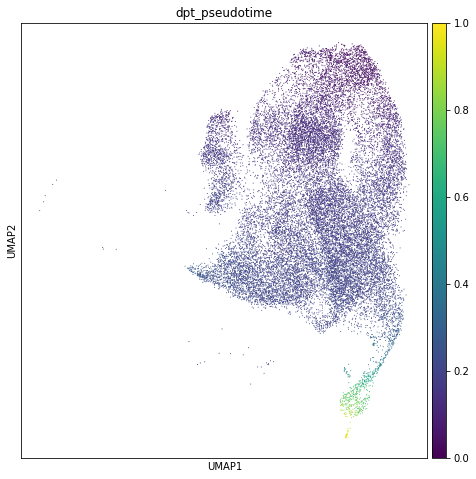

In [71]:
sc.pl.umap(adata, color='dpt_pseudotime')

In [72]:
adata.obs.groupby('louvain_r0.2_0_sub').mean()['dpt_pseudotime']

louvain_r0.2_0_sub
NSC1a               0.192639
NSC2a               0.201926
NSC (G2M-phase)     0.109352
NCSC                     NaN
apop. NPC           0.165962
Glial precursors         NaN
Immature neurons    0.688356
Name: dpt_pseudotime, dtype: float32

In [73]:
adata.obs.groupby('louvain_r0.2').mean()['dpt_pseudotime']

louvain_r0.2
NSC                 0.196296
NSC (G2M-phase)     0.109352
NCSC                     NaN
apop. NPC           0.165962
Glial precursors         NaN
Immature neurons    0.688356
Name: dpt_pseudotime, dtype: float32

Results:
- DPT doesn't give a hierarchy of development in the NPC clusters. It rather separates `NPCs` from the rest, but does not give further substructure.

Note:
- trajectories should probably have CC removed.

# Summary plots

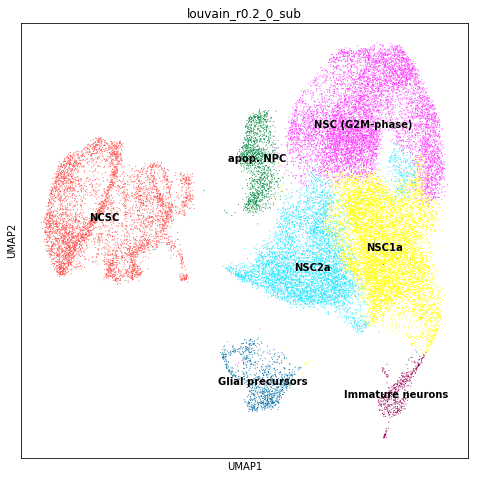

In [74]:
sc.pl.umap(adata, color='louvain_r0.2_0_sub', palette=sc.pl.palettes.godsnot_64, legend_loc='on data', save='_clustering_hvg_fine')


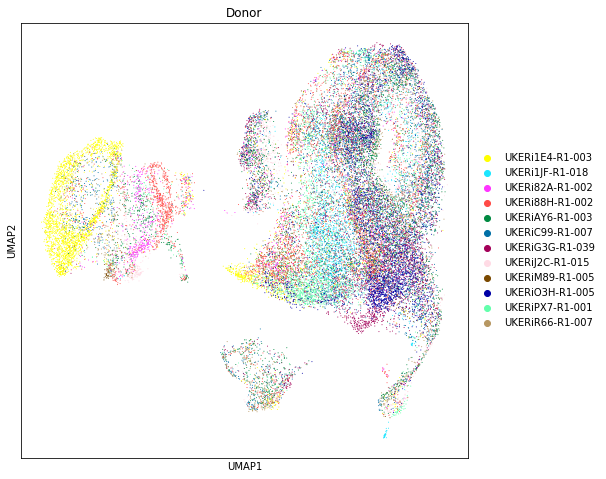

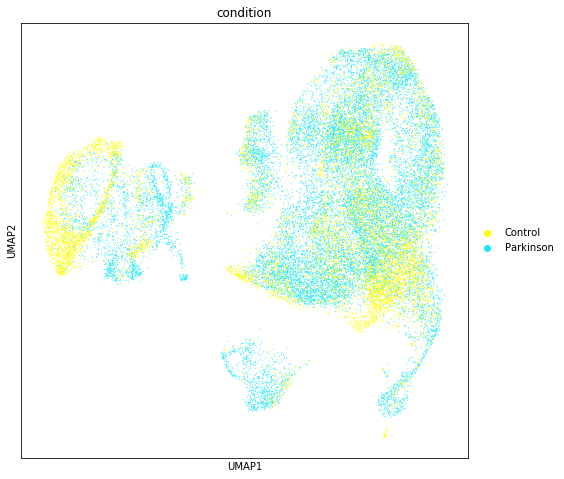

In [75]:
sc.pl.umap(adata, color='Donor', palette=sc.pl.palettes.godsnot_64, save='_Donor_dist_hvg')
sc.pl.umap(adata, color='condition', palette=sc.pl.palettes.godsnot_64, save='_condition_dist_hvg')

# Summary statistics

In [76]:
# CC phase per cluster
adata.obs.groupby(['louvain_r0.2_0_sub'])['phase'].value_counts()
adata.obs.groupby(['louvain_r0.2_0_4_sub'])['phase'].value_counts()

louvain_r0.2_0_sub  phase
NSC1a               G1       4438
                    S        4162
                    G2M        93
NSC2a               G1       3856
                    S        1710
                    G2M        82
NSC (G2M-phase)     G2M      5092
                    S        3007
                    G1         68
NCSC                S        2530
                    G2M      1521
                    G1       1152
apop. NPC           S         604
                    G2M       529
                    G1        236
Glial precursors    G1        499
                    S         312
                    G2M       168
Immature neurons    G1        489
                    S           8
                    G2M         1
Name: phase, dtype: int64

louvain_r0.2_0_4_sub  phase
NSC1a                 G1       4438
                      S        4162
                      G2M        93
NSC2a                 G1       3856
                      S        1710
                      G2M        82
NSC (G2M-phase)       G2M      5092
                      S        3007
                      G1         68
NCSC                  S        2530
                      G2M      1521
                      G1       1152
apop. NPC             S         604
                      G2M       529
                      G1        236
Glial precursors,0    G1        467
                      S         187
Glial precursors,1    S         114
                      G2M        57
Glial precursors,2    G2M       111
                      G1         32
                      S          11
Immature neurons      G1        489
                      S           8
                      G2M         1
Name: phase, dtype: int64

Notes:
- Cell cycle can be seen to separate NSC (G2M-phase) from the other two subclusters (G1 & S vs G2M & some S)
- CC also separates Cluster 3 subclusters (G1 & S vs G2M & some S)
- immature neurons are mainly in G1 phase

In [77]:
adata.obs.groupby(['louvain_r0.2_0_sub', 'condition'])['phase'].value_counts()

louvain_r0.2_0_sub  condition  phase
NSC1a               Control    G1       2354
                               S        1472
                               G2M        19
                    Parkinson  S        2690
                               G1       2084
                               G2M        74
NSC2a               Control    G1       1510
                               S         443
                               G2M        19
                    Parkinson  G1       2346
                               S        1267
                               G2M        63
NSC (G2M-phase)     Control    G2M      1435
                               S         857
                               G1         27
                    Parkinson  G2M      3657
                               S        2150
                               G1         41
NCSC                Control    S        1512
                               G2M       821
                               G1        525
                  

Notes:
- no distinct separation of cell cycle over condition in any cluster

In [78]:
adata.obs['louvain_r0.2_0_sub'].value_counts(normalize=True)

NSC1a               0.284485
NSC (G2M-phase)     0.267271
NSC2a               0.184835
NCSC                0.170272
apop. NPC           0.044802
Glial precursors    0.032038
Immature neurons    0.016297
Name: louvain_r0.2_0_sub, dtype: float64

In [79]:
adata.obs.groupby(['louvain_r0.2_0_sub'])['condition'].value_counts()
adata.obs.groupby(['louvain_r0.2_0_sub'])['condition'].value_counts(normalize=True)
adata.obs['condition'].value_counts(normalize=True)

louvain_r0.2_0_sub  condition
NSC1a               Parkinson    4848
                    Control      3845
NSC2a               Parkinson    3676
                    Control      1972
NSC (G2M-phase)     Parkinson    5848
                    Control      2319
NCSC                Control      2858
                    Parkinson    2345
apop. NPC           Parkinson     949
                    Control       420
Glial precursors    Parkinson     826
                    Control       153
Immature neurons    Parkinson     395
                    Control       103
Name: condition, dtype: int64

louvain_r0.2_0_sub  condition
NSC1a               Parkinson    0.557690
                    Control      0.442310
NSC2a               Parkinson    0.650850
                    Control      0.349150
NSC (G2M-phase)     Parkinson    0.716052
                    Control      0.283948
NCSC                Control      0.549298
                    Parkinson    0.450702
apop. NPC           Parkinson    0.693207
                    Control      0.306793
Glial precursors    Parkinson    0.843718
                    Control      0.156282
Immature neurons    Parkinson    0.793173
                    Control      0.206827
Name: condition, dtype: float64

Parkinson    0.618091
Control      0.381909
Name: condition, dtype: float64

Notes:
- all conditions have at least 100 control cells. Means probably robust at this level.
- Parkinson condition appears to have higher proportion in "immature neurons", in "glial precursors (myelinating)", and in "NSC (G2M-phase)" than expected.

# Save data

In [80]:
adata.write(adata_full)